<a href="https://colab.research.google.com/github/ScarrryMary/Project_group24-25/blob/main/Seminar2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

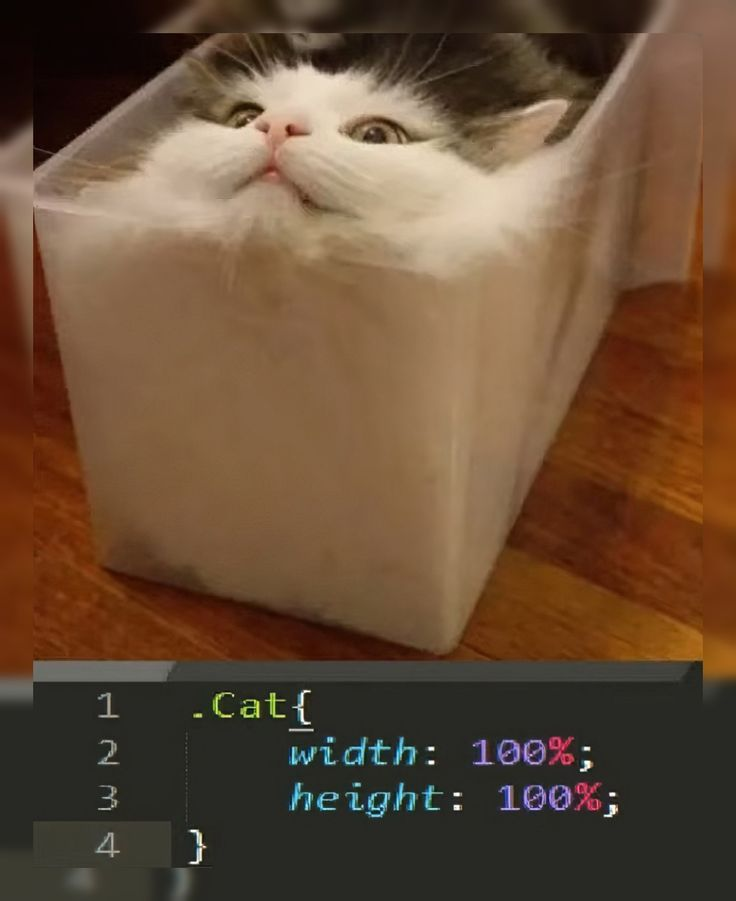

## Advance Data Structure  


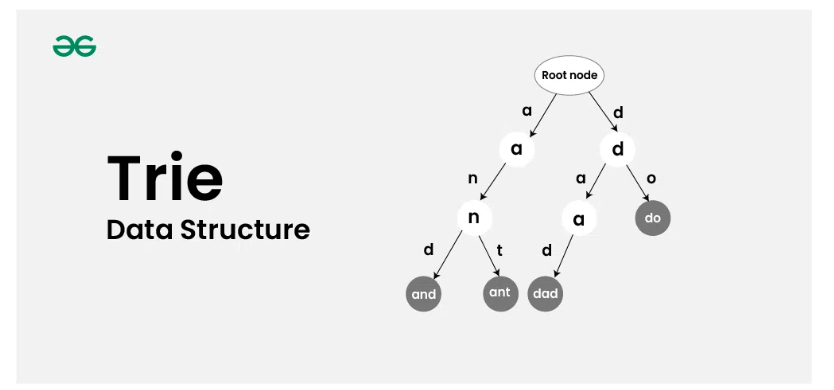

## Trie Data Structure  

Структура данных **trie**, также известная как дерево префиксов, представляет собой древовидную структуру данных, используемую для эффективного извлечения пар ключ-значение. Он обычно используется для реализации словарей и функций автозаполнения, что делает его фундаментальным компонентом многих поисковых алгоритмов.  

Слово **Trie** происходит от **reTRIEval**, что означает найти что-то или получить это.  

Структура данных trie следует тому свойству, что если две строки имеют общий префикс, то у них будет один и тот же предок в trie. Именно это свойство позволяет найти все слова с заданным префиксом.

**Преимущества структуры данных Trie по сравнению с хеш-таблицей:**  
Структура данных trie имеет следующие преимущества по сравнению с хеш-таблицей:

* Мы можем эффективно выполнять поиск префиксов (или автозаполнение) с помощью Trie.

* Мы можем легко напечатать все слова в алфавитном порядке, что не так просто сделать с помощью хеширования.

* В структуре данных Trie нет накладных расходов на хеш-функции.

* Поиск строки даже в большой коллекции строк в структуре данных Trie может быть выполнен в сложности $O(L)$, где $L$ — количество слов в строке запроса. Это время поиска может быть даже меньше, чем $O(L)$, если строка запроса не существует в trie.

**Свойства структуры данных Trie**  
* Каждый Trie имеет пустой корневой узел со ссылками (или ссылками) на другие узлы

* Каждый узел Trie представляет строку, а каждое ребро представляет символ.

* Каждый узел состоит из хэш-карт или массива указателей, где каждый индекс представляет собой символ и флаг, указывающий, заканчивается ли какая-либо строка на текущем узле.

* Структура данных Trie может содержать любое количество символов, включая алфавиты, цифры и специальные символы. Но в этой статье мы обсудим строки с символами a-z. Таким образом, для каждого узла требуется всего 26 указателей, где 0-й индекс представляет «a», а 25-й индекс — символы «z».

* Каждый путь от корня к какому-либо узлу представляет собой слово или строку.

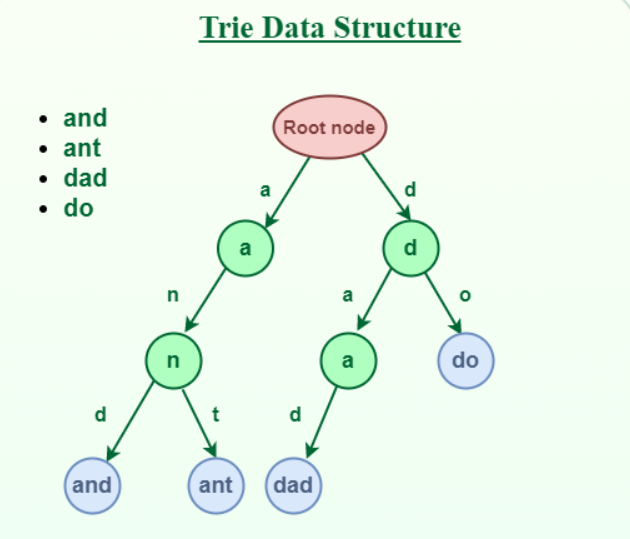

Итак, для хранения слова нам нужно взять массив (контейнер) размера 26 и изначально все символы пустые, так как слов нет и это будет выглядеть так, как показано ниже.

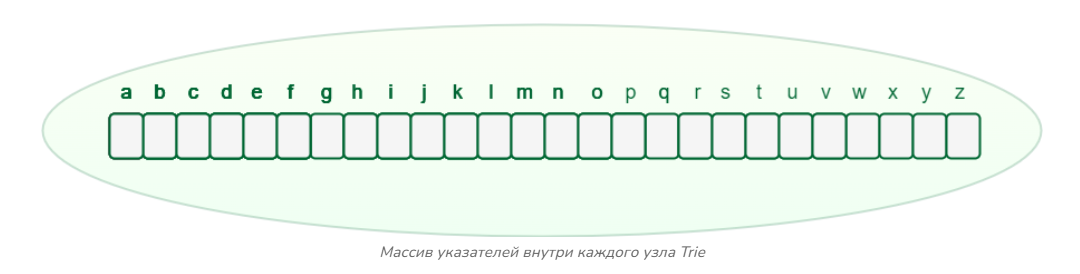

Давайте посмотрим, как слова "and" и "ant" хранятся в структуре данных Trie:

**Храним "and" в структуре данных Trie:**  
* Слово «and» начинается с «а», поэтому мы отметим позицию «а» как заполненную в узле Trie, который представляет использование «а».

* После размещения первого символа, для второго символа снова есть 26 возможностей, Таким образом, от "a", снова идет массив размера 26, для хранения 2-го символа.

* Второй символ - "n", поэтому от "a" мы перейдем к "n" и отметим "n" во 2-м массиве как используемый.

* После "n" 3-й символ - "d", поэтому отметьте позицию "d" как используемую в соответствующем массиве.


**Храним "ant" в структуре данных Trie:**
* Слово «ant» начинается с «а», а позиция «а» в корневом узле уже заполнена. Итак, нет необходимости заполнять его снова, просто перейдите к узлу 'a' в Trie.

* Для второго символа 'n' мы можем наблюдать, что позиция 'n' в узле 'a' уже заполнена. Так что нет необходимости заполнять его снова, просто перейдите к узлу 'n' в Trie.

* Для последнего символа 't' слова позиция для 't' в узле 'n' не заполняется. Итак, заполните позицию 't' в 'n' узле и перейдем к 't' узлу.


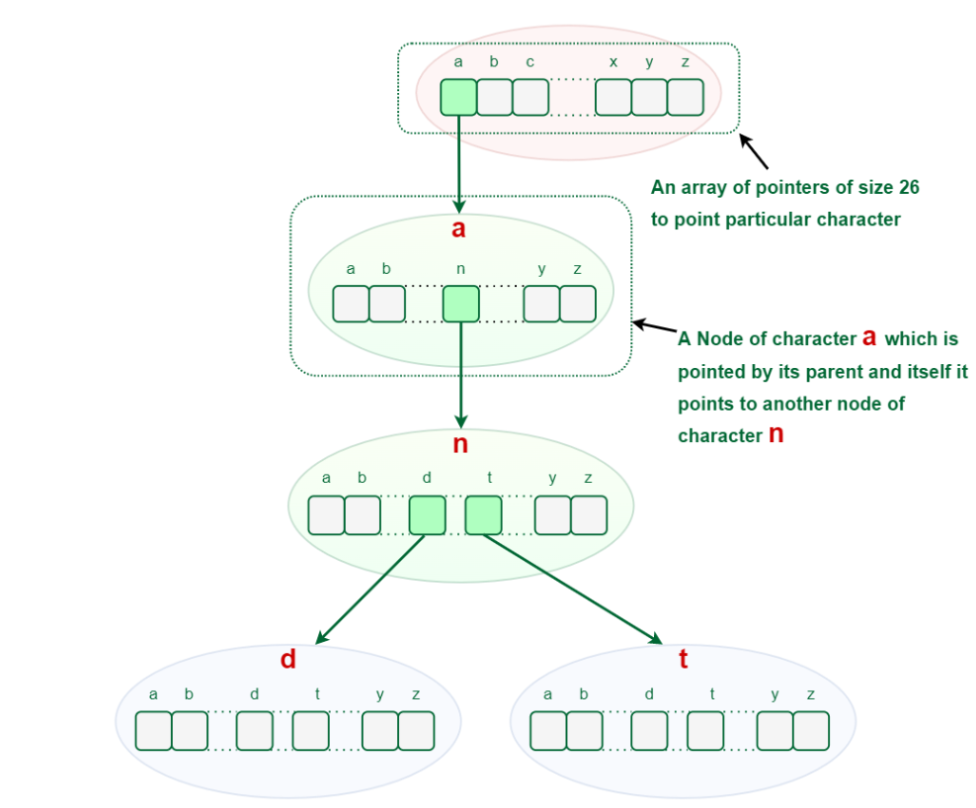

In [ ]:
# Python code
class TrieNode:

    # Trie node class
    def _init_(self):
        self.children = [None for _ in range(26)]

        # This will keep track of number of strings that are
        # stored in the Trie from root node to any Trie node.
        self.wordCount = 0


**Основные операции над структурой данных Trie:**
* Вставка
* Поиск
* Удаление

**1.** Вставка в структуру данных Trie:

Эта операция используется для вставки новых строк в структуру данных Trie. Давайте посмотрим, как это работает:

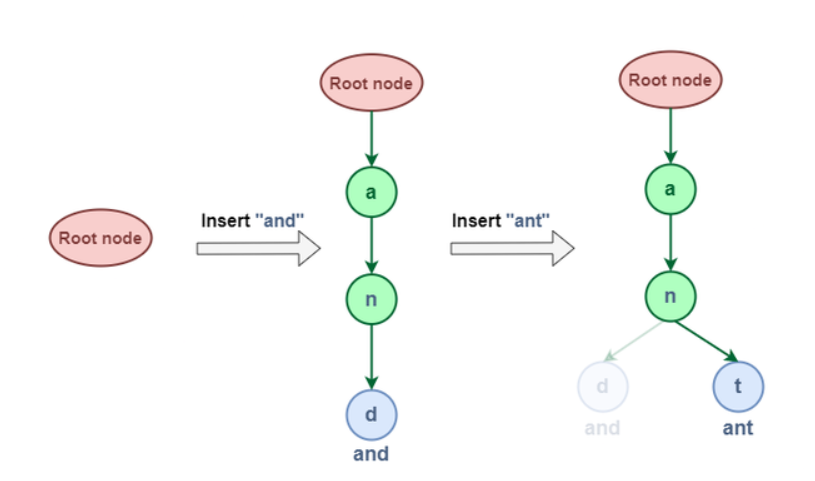

Из приведенного выше представления вставки мы можем видеть, что слова "and" и "ant" имеют некоторый общий узел (т.е. "an"), это происходит из-за свойства структуры данных Trie, что если две строки имеют общий префикс, то у них будет один и тот же предок в trie.

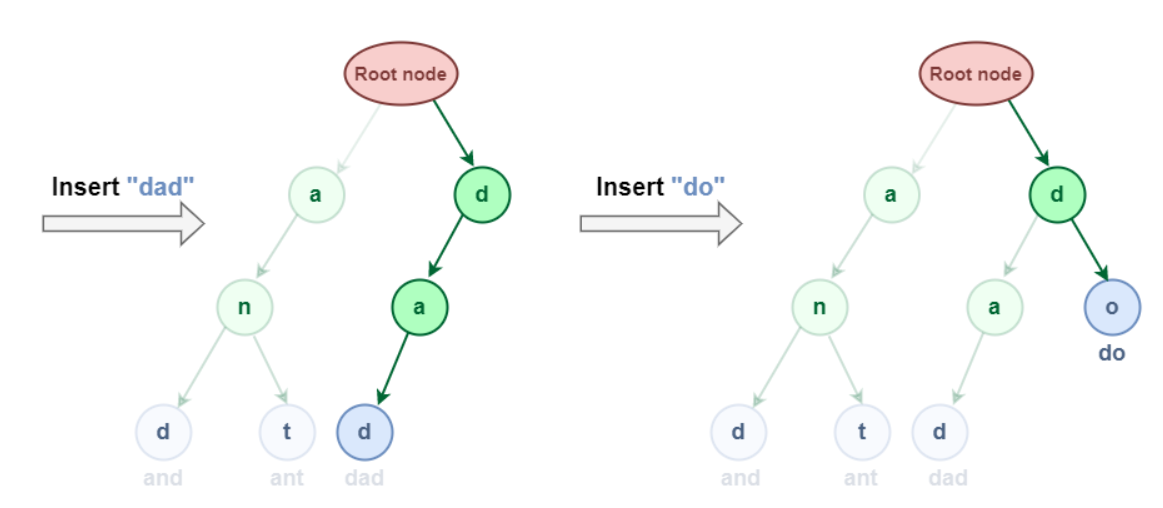

**Реализация вставки в структуру данных Trie:**

Алгоритм:

* Определим функцию insert(TrieNode *root, string &word), которая будет принимать два параметра: один для корня, а другой для строки, которую мы хотим вставить в структуру данных Trie.

* Теперь возьмем еще один указатель currentNode и инициализируем его корневым узлом.

* Перебираем по длине заданной строки и проверяем, равно ли значение NULL или нет в массиве указателей на текущий символ строки.

* Если оно равно NULL, то создайте новый узел и укажите текущему символу на этот вновь созданный узел.

* Переместите курсор на только что созданный узел.

* Наконец, увеличьте значение wordCount последнего currentNode, это означает, что существует строка, заканчивающаяся currentNode.

In [ ]:
def insert_key(root, key):
    # Initialize the currentNode pointer
    # with the root node
    currentNode = root

    # Iterate across the length of the string
    for c in key:
        # Check if the node exist for the current
        # character in the Trie.
        if currentNode.childNode[ord(c) - ord('a')] == None:
            # If node for current character does not exist
            # then make a new node
            newNode = TrieNode()

            # Keep the reference for the newly created
            # node.
            currentNode.childNode[ord(c) - ord('a')] = newNode

        # Now, move the current node pointer to the newly
        # created node.
        currentNode = currentNode.childNode[ord(c) - ord('a')]

    # Increment the wordEndCount for the last currentNode
    # pointer this implies that there is a string ending at
    # currentNode.
    currentNode.wordCount += 1


**2**. Поиск


Операция поиска в Trie выполняется аналогично операции вставки, но единственное отличие заключается в том, что всякий раз, когда мы обнаруживаем, что массив указателей в узле curr не указывает на текущий символ слова, мы возвращаем false, а не создаем новый узел для этого текущего символа слова.

Эта операция используется для поиска наличия строки в структуре данных Trie или нет. В структуре данных Trie существует два подхода к поиску.

* Выясните, существует ли данное слово в Trie.

* Узнайте, существует ли в Trie слово, начинающееся с заданного префикса.

В обоих подходах существует схожий шаблон поиска. Первым шагом в поиске заданного слова в Trie является преобразование слова в символы, а затем сравнение каждого символа с узлом trie из корневого узла. Если текущий символ присутствует в узле, переходим к его дочерним элементам. Повторяйте этот процесс, пока не будут найдены все символы.

**2.1 Поиск префикса в структуре данных Trie:**

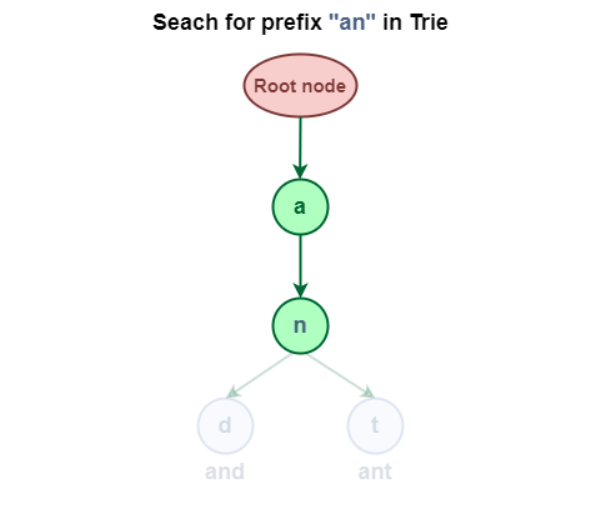

In [ ]:
def is_prefix_exist(root, key):
    # Initialize the currentNode pointer
    # with the root node
    current_node = root

    # Iterate across the length of the string
    for c in key:
        # Check if the node exist for the current
        # character in the Trie.
        if current_node.child_node[ord(c) - ord('a')] is None:
            # Given word as a prefix does not exist in Trie
            return False

        # Move the currentNode pointer to the already
        # existing node for current character.
        current_node = current_node.child_node[ord(c) - ord('a')]

    # Prefix exist in the Trie
    return True


**2.2 Поиск полного слова в структуре данных Trie:**  
Это похоже на поиск по префиксу, но дополнительно мы должны проверить, заканчивается ли слово на последнем символе слова или нет.

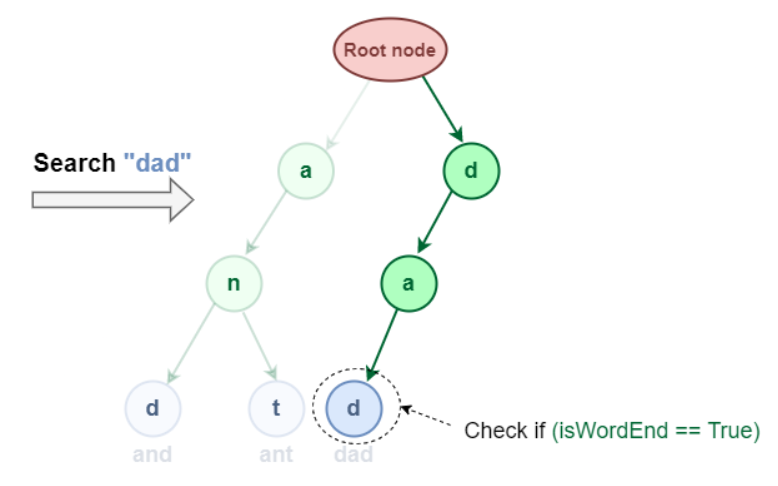

In [ ]:
def search_key(root, key):
    # Initialize the currentNode pointer with the root node
    currentNode = root

    # Iterate across the length of the string
    for c in key:
        # Check if the node exist for the current character in the Trie
        if currentNode.childNode[ord(c) - ord('a')] is None:
            # Given word does not exist in Trie
            return False

        # Move the currentNode pointer to the already existing node for current character
        currentNode = currentNode.childNode[ord(c) - ord('a')]

    # Return if the wordCount is greater than 0
    return currentNode.wordCount > 0


**3**. Удаление

Эта операция используется для удаления строк из структуры данных Trie. Существует три случая удаления слова из Trie.

* Удаленное слово является префиксом других слов в Trie.
* Удаленное слово имеет общий префикс с другими словами в Trie.
* Удаленное слово не имеет общего префикса с другими словами в Trie.

**3.1 Удаленное слово является префиксом других слов в Trie.**
Как показано на следующем рисунке, удаленное слово "an" имеет общий префикс с другим словом "and" и "ant".

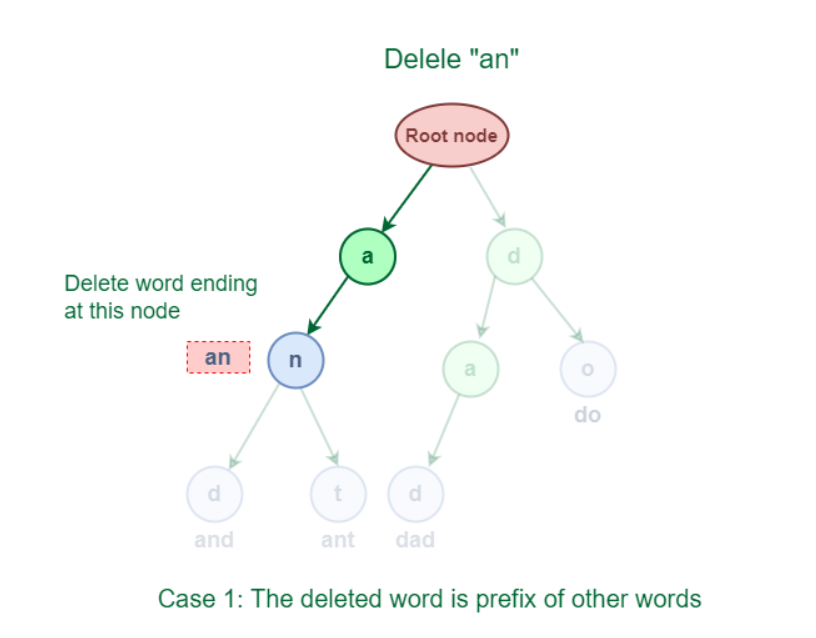

Простое решение для выполнения операции удаления в этом случае — просто уменьшить значение wordCount на 1 в конечном узле слова.

**3.2 Удаленное слово имеет общий префикс с другими словами в Trie.**

Как показано на следующем рисунке, удаленное слово «и» имеет некоторые общие префиксы с другими словами «ant». Они имеют общую приставку «аn».



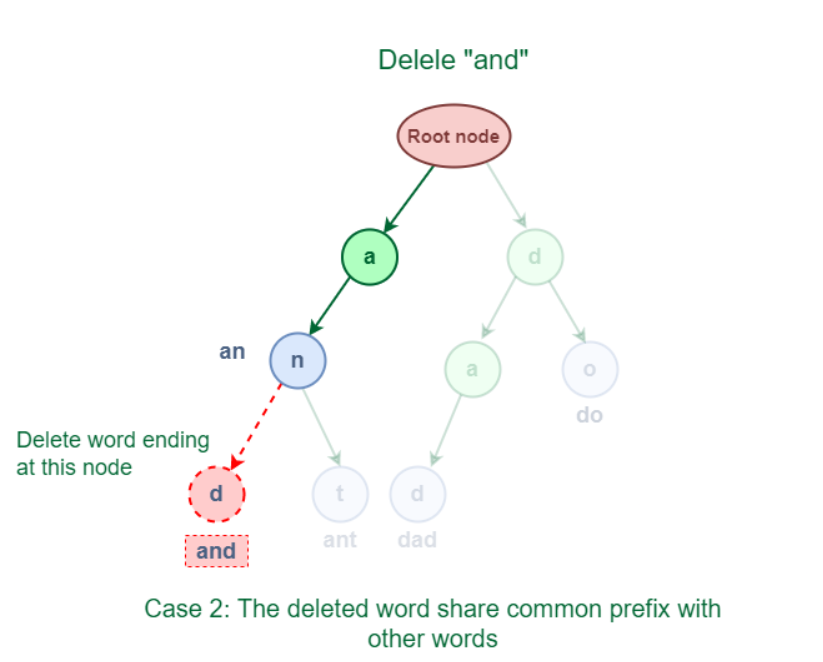

Решением для этого случая является удаление всех узлов, начиная от конца префикса до последнего символа данного слова.

**3.3 Удаленное слово не имеет общего префикса с другими словами в Trie.**

Как показано на следующем рисунке, слово «geek» не имеет общего префикса с какими-либо другими словами.

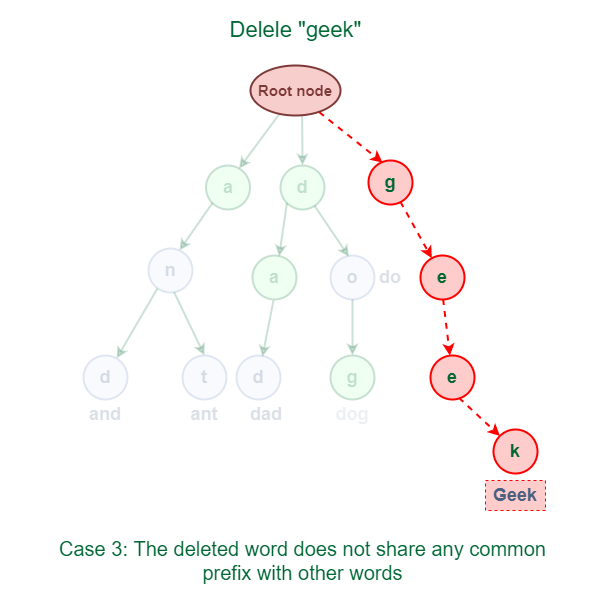

Решение в этом случае заключается в том, чтобы просто удалить все узлы.

In [ ]:
def delete_key(root, word):
    current_node = root
    last_branch_node = None
    last_branch_char = 'a'

    # loop through each character in the word
    for c in word:
        # if the current node doesn't have a child with the current character,
        # return False as the word is not present in Trie
        if current_node.childNode[ord(c) - ord('a')] is None:
            return False
        else:
            count = 0
            # count the number of children nodes of the current node
            for i in range(26):
                if current_node.childNode[i] is not None:
                    count += 1

            # if the count of children is more than 1,
            # store the node and the current character
            if count > 1:
                last_branch_node = current_node
                last_branch_char = c

            current_node = current_node.childNode[ord(c) - ord('a')]

    count = 0
    # count the number of children nodes of the current node
    for i in range(26):
        if current_node.childNode[i] is not None:
            count += 1

    # Case 1: The deleted word is a prefix of other words in Trie
    if count > 0:
        current_node.wordCount -= 1
        return True

    # Case 2: The deleted word shares a common prefix with other words in Trie
    if last_branch_node is not None:
        last_branch_node.childNode[ord(last_branch_char) - ord('a')] = None
        return True

    # Case 3: The deleted word does not share any common prefix with other words in Trie
    else:
        root.childNode[ord(word[0]) - ord('a')] = None
        return True


### **Внедрим структуру данных Trie**
Алгоритм:

* Создайте корневой узел с помощью конструктора TrieNode().

* Храним коллекцию строк, которые мы должны вставить в trie в векторе строк, скажем, arr.

* Вставка всех строк в Trie с помощью функции insertkey(),

* Ищите строки из searchQueryStrings с помощью функции search_key().

* Удалите строки, присутствующие в deleteQueryStrings, с помощью delete_key.

In [ ]:
# Trie implementation in Python

class TrieNode:
    def __init__(self):
        # pointer array for child nodes of each node
        self.childNode = [None] * 26
        self.wordCount = 0

def insert_key(root, key):
    # Initialize the currentNode pointer with the root node
    currentNode = root

    # Iterate across the length of the string
    for c in key:
        # Check if the node exist for the current character in the Trie.
        if not currentNode.childNode[ord(c) - ord('a')]:
            # If node for current character does not exist
            # then make a new node
            newNode = TrieNode()
            # Keep the reference for the newly created node.
            currentNode.childNode[ord(c) - ord('a')] = newNode
        # Now, move the current node pointer to the newly created node.
        currentNode = currentNode.childNode[ord(c) - ord('a')]
    # Increment the wordEndCount for the last currentNode
    # pointer this implies that there is a string ending at currentNode.
    currentNode.wordCount += 1

def search_key(root, key):
    # Initialize the currentNode pointer with the root node
    currentNode = root

    # Iterate across the length of the string
    for c in key:
        # Check if the node exist for the current character in the Trie.
        if not currentNode.childNode[ord(c) - ord('a')]:
            # Given word does not exist in Trie
            return False
        # Move the currentNode pointer to the already existing node for current character.
        currentNode = currentNode.childNode[ord(c) - ord('a')]

    return currentNode.wordCount > 0

def delete_key(root, word):
    currentNode = root
    lastBranchNode = None
    lastBrachChar = 'a'

    for c in word:
        if not currentNode.childNode[ord(c) - ord('a')]:
            return False
        else:
            count = 0
            for i in range(26):
                if currentNode.childNode[i]:
                    count += 1
            if count > 1:
                lastBranchNode = currentNode
                lastBrachChar = c
            currentNode = currentNode.childNode[ord(c) - ord('a')]

    count = 0
    for i in range(26):
        if currentNode.childNode[i]:
            count += 1

    # Case 1: The deleted word is a prefix of other words in Trie.
    if count > 0:
        currentNode.wordCount -= 1
        return True

    # Case 2: The deleted word shares a common prefix with other words in Trie.
    if lastBranchNode:
        lastBranchNode.childNode[ord(lastBrachChar) - ord('a')] = None
        return True
    # Case 3: The deleted word does not share any common prefix with other words in Trie.
    else:
        root.childNode[ord(word[0]) - ord('a')] = None
        return True
# Driver Code
if __name__ == '__main__':
    # Make a root node for the Trie
    root = TrieNode()

    # Stores the strings that we want to insert in the Trie
    input_strings = ["and", "ant", "do", "geek", "dad", "ball"]

    # number of insert operations in the Trie
    n = len(input_strings)

    for i in range(n):
        insert_key(root, input_strings[i])

    # Stores the strings that we want to search in the Trie
    search_query_strings = ["do", "geek", "bat"]

    # number of search operations in the Trie
    search_queries = len(search_query_strings)

    for i in range(search_queries):
        print("Query String:", search_query_strings[i])
        if search_key(root, search_query_strings[i]):
            # the queryString is present in the Trie
            print("The query string is present in the Trie")
        else:
            # the queryString is not present in the Trie
            print("The query string is not present in the Trie")

    # stores the strings that we want to delete from the Trie
    delete_query_strings = ["geek", "tea"]

    # number of delete operations from the Trie
    delete_queries = len(delete_query_strings)

    for i in range(delete_queries):
        print("Query String:", delete_query_strings[i])
        if delete_key(root, delete_query_strings[i]):
            # The queryString is successfully deleted from the Trie
            print("The query string is successfully deleted")
        else:
            # The query string is not present in the Trie
            print("The query string is not present in the Trie")


Query String: do
The query string is present in the Trie
Query String: geek
The query string is present in the Trie
Query String: bat
The query string is not present in the Trie
Query String: geek
The query string is successfully deleted
Query String: tea
The query string is not present in the Trie


**Анализ сложности структуры данных Trie**

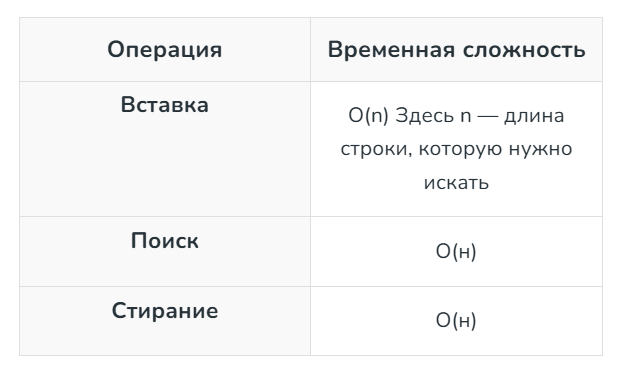

### Применение структуры данных Trie:
1. Функция автозаполнения:   
Автозаполнение предлагает предложения на основе того, что вы вводите в поле поиска. Для реализации функционала автозаполнения используется структура данных Trie.

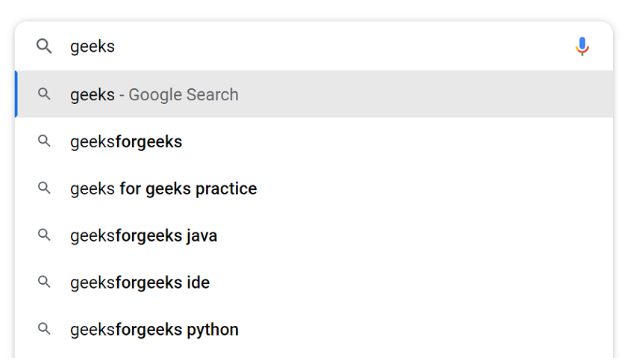

2. **Проверка орфографии**:   
Если введенное слово не отображается в словаре, то он показывает предложения, основанные на том, что вы ввели.
Это 3-этапный процесс, который включает в себя:

* Проверяем наличие слова в словаре данных.
* Генерация потенциальных предложений.
* Сортировка предложений с более высоким приоритетом сверху.
* Trie хранит словарь данных и упрощает построение алгоритма поиска слова из словаря, а также предоставляет список допустимых слов для предложения.

3. **Алгоритм сопоставления самых длинных префиксов (Maximum Prefix Length Match)**:  
Этот алгоритм используется в сети устройствами маршрутизации в IP-сетях. Оптимизация сетевых маршрутов требует непрерывной маскировки, которая ограничивает сложность поиска временем с точностью до $O(n)$, где $n$ — длина URL-адреса в битах.

Чтобы ускорить процесс поиска, были разработаны схемы Multiple Bit trie, которые выполняют поиск нескольких бит быстрее.

**Преимущества структуры данных Trie:**
* Trie позволяет нам вводить и находить слова за O(n) время, где n — длина одного слова. Он быстрее по сравнению с хеш-таблицами и двоичными деревьями поиска.

* Он обеспечивает алфавитную фильтрацию записей по ключу узла и, следовательно, облегчает печать всех слов в алфавитном порядке.

* Поиск префиксов/Сопоставление самых длинных префиксов может быть эффективно выполнено с помощью структуры данных trie.

* Поскольку trie не нуждается в какой-либо хеш-функции для своей реализации, они, как правило, быстрее, чем хеш-таблицы для небольших ключей, таких как целые числа и указатели.

* Trie поддерживают упорядоченную итерацию, в то время как итерация в хеш-таблице приведет к псевдослучайному порядку, задаваемому хеш-функцией, который обычно более громоздкий.

* Удаление также является простым алгоритмом с O(n) в качестве временной сложности, где n — длина удаляемого слова.


**Недостатки структуры данных Trie:**
* Основным недостатком этой системы является то, что для хранения всех строк требуется много памяти. Для каждого узла у нас слишком много указателей на узел, которые в худшем случае равны no символов.

* Эффективно построенная хеш-таблица (т.е. хорошая хеш-функция и разумный коэффициент нагрузки) имеет O(1) как время поиска, которое намного быстрее, чем O(l) в случае trie, где l — длина строки.

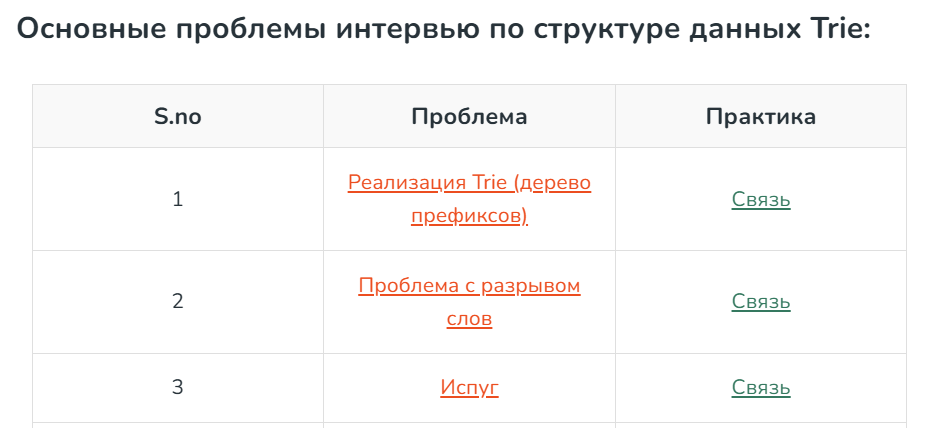

### Задача на разрыв слов

Если у вас есть входная строка и словарь слов, выясните, можно ли разделить входную строку на последовательность словарных слов, разделенную пробелами.

Это известный вопрос на собеседовании в Google, который также задают многие другие компании.

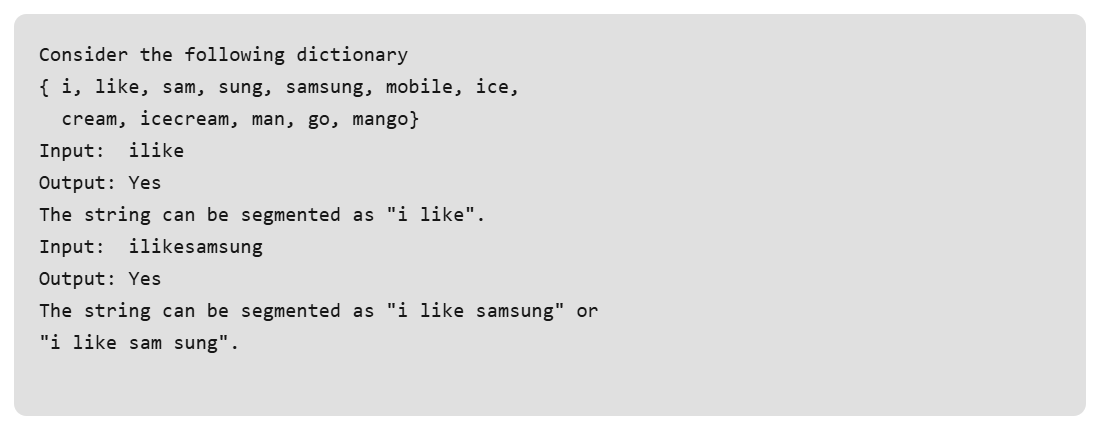

In [ ]:
class Solution(object):
	def wordBreak(self, s, wordDict):
		"""
		Author : @amitrajitbose
		:type s: str
		:type wordDict: List[str]
		:rtype: bool
		"""
		"""CREATING THE TRIE CLASS"""

		class TrieNode(object):

			def __init__(self):
				self.children = [] # will be of size = 26
				self.isLeaf = False

			def getNode(self):
				p = TrieNode() # new trie node
				p.children = []
				for i in range(26):
					p.children.append(None)
				p.isLeaf = False
				return p

			def insert(self, root, key):
				key = str(key)
				pCrawl = root
				for i in key:
					index = ord(i)-97
					if(pCrawl.children[index] == None):
						# node has to be initialised
						pCrawl.children[index] = self.getNode()
					pCrawl = pCrawl.children[index]
				pCrawl.isLeaf = True # marking end of word

			def search(self, root, key):
				# print("Searching %s" %key) #DEBUG
				pCrawl = root
				for i in key:
					index = ord(i)-97
					if(pCrawl.children[index] == None):
						return False
					pCrawl = pCrawl.children[index]
				if(pCrawl and pCrawl.isLeaf):
					return True

		def checkWordBreak(strr, root):
			n = len(strr)
			if(n == 0):
				return True
			for i in range(1, n+1):
				if(root.search(root, strr[:i]) and checkWordBreak(strr[i:], root)):
					return True
			return False

		"""IMPLEMENT SOLUTION"""
		root = TrieNode().getNode()
		for w in wordDict:
			root.insert(root, w)
		out = checkWordBreak(s, root)
		if(out):
			return "Yes"
		else:
			return "No"


print(Solution().wordBreak("thequickbrownfox",
						["the", "quick", "fox", "brown"]))
print(Solution().wordBreak("bedbathandbeyond", [
	"bed", "bath", "bedbath", "and", "beyond"]))
print(Solution().wordBreak("bedbathandbeyond", [
	"teddy", "bath", "bedbath", "and", "beyond"]))
print(Solution().wordBreak("bedbathandbeyond", [
	"bed", "bath", "bedbath", "and", "away"]))


Yes
Yes
Yes
No


### Подсчет инверсий в массиве  

Inversion Count для массива указывает на то, насколько далеко (или близко) массив находится от сортировки. Если массив уже отсортирован, то счетчик инверсий равен 0. Если массив отсортирован в обратном порядке, то количество инверсий является максимальным.

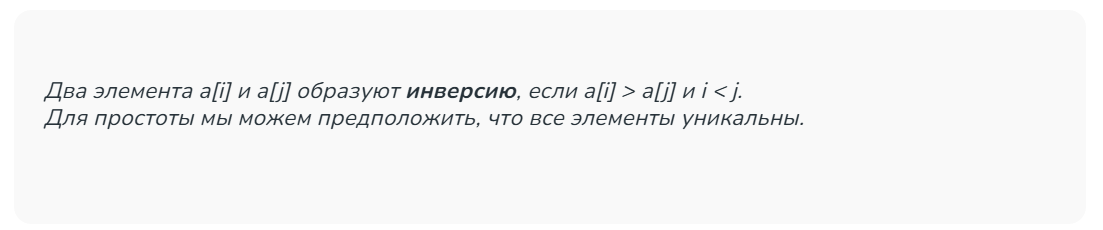

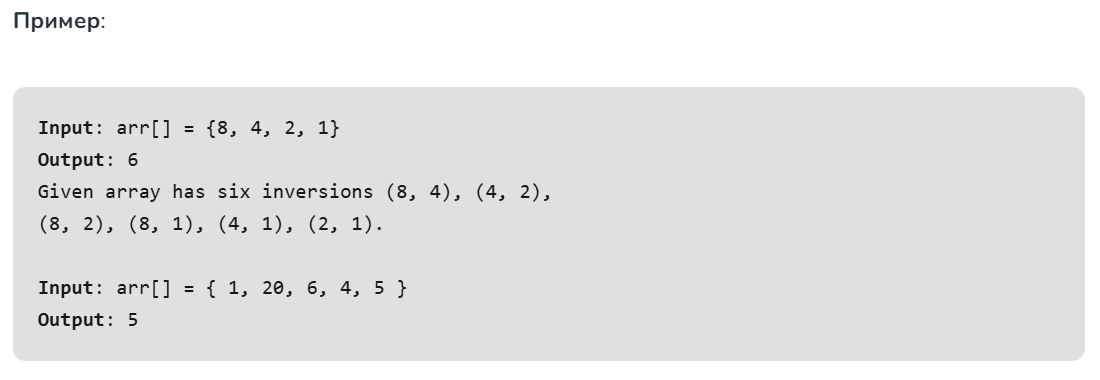

**Подход:**  
Мы будем выполнять итерации в обратном направлении в массиве и сохранять каждый элемент в Trie. Чтобы сохранить число в Trie, мы
должны разбить его на двоичную форму, и если бит равен 0, то это означает, что мы сохраняем этот бит в левом указателе текущего узла, а если он равен 1, мы сохраним его в правом указателе текущего узла и соответственно изменим текущий узел. Мы также будем поддерживать счетчик, который означает, сколько чисел следуют по одному и тому же пути до этого узла.  

Структура узла Trie



> struct node{  
  int count;   
  node* left;  
  node* right;  
};



In [ ]:
# Python3 implementation

# Structure of the node
class Node:

	def __init__(self):

		self.left = self.right = None
		self.count = 1

# function to initialize
# new node
def makeNewNode():

	temp = Node()
	return temp

# Insert element in trie
def insertElement(num, root, ans):

	# Converting the number
	# into binary form
	for i in range(63, -1, -1):

		# Checking if the i-th
		# bit ios set or not
		a = (num & (1 << i));

		# If the bit is 1
		if (a != 0):

			# if the bit is 1 that means
			# we have to go to the right
			# but we also checks if left
			# pointer exists i.e there is
			# at least a number smaller than
			# the current number already in
			# the trie we add that count
			# to ans
			if (root.left != None):
				ans += root.left.count;

			# If right pointer is not None
			# we just iterate to that
			# position and increment the count
			if (root.right != None):
				root = root.right;
				root.count += 1;

			# If right is None we add a new
			# node over there and initialize
			# the count with 1
			else:
				temp = makeNewNode();
				root.right = temp;
				root = root.right;

		# if the bit is 0
		else:

			# We have to iterate to left,
			# we first check if left
			# exists? if yes then change
			# the root and the count
			if (root.left != None):
				root = root.left;
				root.count += 1

			# otherwise we create
			# the left node
			else:
				temp = makeNewNode();
				root.left = temp;
				root = root.left;
	return ans

# function to count
# the inversions
def getInvCount(arr, n):

	head = makeNewNode();
	ans = 0;

	for i in range(n - 1 ,-1, -1):

		# inserting each element in Trie
		ans = insertElement(arr[i], head, ans);

	return ans;

# Driver Code
if __name__=='__main__':

	arr = [ 8, 4, 2, 1 ]

	n = len(arr)

	print("Number of inversions are : " + str(getInvCount(arr, n)))

	# This code is contributed by rutvik_56


Number of inversions are : 6


Временная сложность: $O(Nlog(N))$      
Вспомогательное пространство: $O(Nlog(N))$      

## Введение в деревья сегментов

Дерево сегментов используется для хранения информации об интервалах массива в его узлах.

* Он позволяет эффективно выполнять запросы по диапазону через интервалы массива.

* Наряду с запросами, он позволяет эффективно обновлять элементы массива.

* Например, мы можем выполнить суммирование диапазона массива между диапазоном от L до R за $O(Log n)$, а также изменить любой элемент массива за $O(Log n)$ время

**Виды операций:**
Деревья сегментов в основном используются для запросов к диапазону в массиве фиксированного размера. Значения элементов массива могут быть изменены. Тип запросов по диапазонам, которые может выполнять дерево сегментов, должен обладать свойством, что для ответа на запрос от L к R мы можем использовать ответы от L к M и M + 1 к R, где M — это точка между L и R, т. е. L <= M <= R.

Ниже приведены несколько примеров запросов к диапазону в массиве.

* Сложение/вычитание
* Максимум/Минимум
* НОД/НОК
* И/ИЛИ/XOR

**Структура дерева**  
Дерево сегментов работает по принципу «разделяй и властвуй».


* На каждом уровне мы делим сегменты массива на две части. Если в данном массиве было [0, . . ., N-1] элементов, то две части массива будут [0, . . ., N/2-1] и [N/2, . . ., N-1].

* Затем мы будем рекурсивно двигаться дальше, пока нижняя и верхняя границы диапазона не сравняются.

* Структура дерева сегментов выглядит как двоичное дерево.

Дерево сегментов обычно представляется с помощью массива, в котором первое значение хранит значение для общего диапазона массива и дочерний элемент узла в точке iЙ индексы находятся в точках $(2*i + 1)$ и $(2 * i + 2)$.

### Построение дерева сегментов  


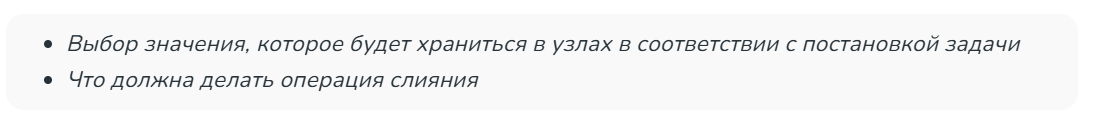

Если в постановке задачи указано, что нам нужно вычислить сумму по диапазонам, то значение в узлах должно хранить сумму значений по диапазонам.

* Значения дочерних узлов объединяются обратно с родительским узлом для хранения значения для этого конкретного диапазона [т.е. диапазона, охватываемого всеми узлами его поддерева].

* В конечном итоге, конечные узлы хранят информацию об одном элементе. Все листовые узлы хранят массив, на основе которого строится дерево сегментов.

Ниже приведены шаги по построению дерева сегментов:

* Начните с листьев дерева

* Рекурсивное построение родительских объектов из операции слияния

Операция слияния будет занимать постоянное время, если оператор использует постоянное время. Таким образом, построение всего дерева занимает $O(N)$ времени.

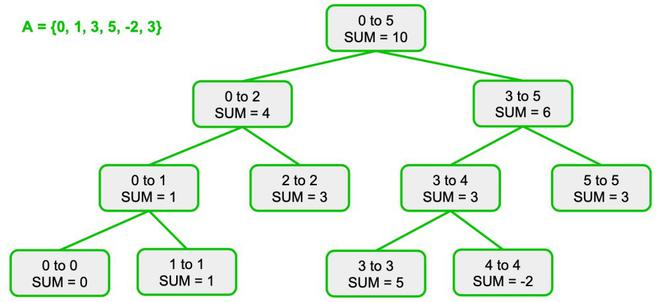

### Запрос диапазона  
Разберемся в этом с помощью следующей задачи  

Даны два целых числа L и R возвращают сумму отрезка [L, R]


Первым шагом является построение дерева сегментов с оператором сложения и 0 в качестве нейтрального элемента.

* Если диапазон является одним из значений диапазона узла, то просто верните ответ.

* В противном случае нам нужно будет обойти левый и правый дочерние узлы и рекурсивно продолжать процесс, пока мы не найдем узел, который покрывает диапазон, полностью покрывающий часть или весь диапазон [L, R]
* Возвращаясь с каждого звонка, нам нужно объединить ответы, полученные от каждого его потомка.

Так как высота дерева сегментов равна $logN$, время запроса будет равно $O(logN)$ на запрос.

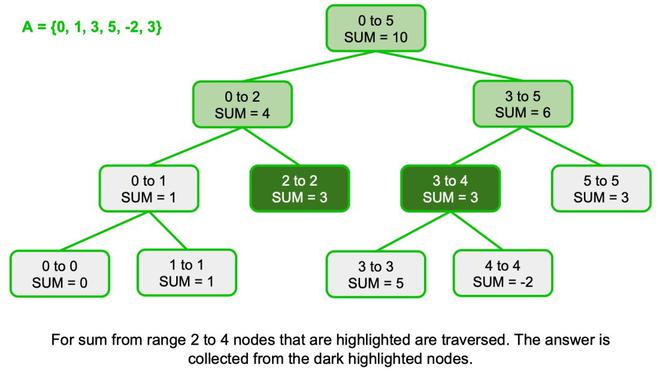

### Обновления точек
По данному индексу $idx$ обновляем значение массива по индексу $idx$ со значением $V$


Вклад элемента заключается только в пути от его листа к родителю. Таким образом , из-за обновления будут затронуты только элементы $logN$.

Для обновления выполните обход до листа, в котором хранится значение индекса $idx$, и обновите значение. Затем, возвращаясь назад по контуру, измените диапазоны соответствующим образом.

Временная сложность будет $O(logN)$.

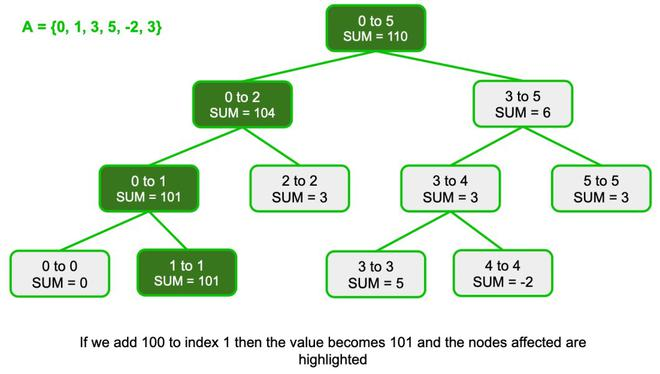

In [ ]:
# python3 code for segment tree with sum
# range and update query
A = []
ST = []


def build(node, L, R):
    global A, ST

    # Leaf node where L == R
    if (L == R):
        ST[node] = A[L]

    else:

        # Find the middle element to
        # split the array into two halves
        mid = (L + R) // 2

        # Recursively travel the
        # left half
        build(2 * node, L, mid)

        # Recursively travel the
        # right half
        build(2 * node + 1, mid + 1, R)

        # Storing the sum of both the
        # children into the parent
        ST[node] = ST[2 * node] + ST[2 * node + 1]


def update(node, L, R, idx, val):
    global A, ST

    # Find the lead node and
    # update its value
    if (L == R):
        A[idx] += val
        ST[node] += val

    else:

        # Find the mid
        mid = (L + R) // 2

        # If node value idx is at the
        # left part then update
        # the left part
        if (L <= idx and idx <= mid):
            update(2 * node, L, mid, idx, val)
        else:
            update(2 * node + 1, mid + 1, R, idx, val)

        # Store the information in parents
        ST[node] = ST[2 * node] + ST[2 * node + 1]


def query(node, tl, tr, l, r):
    global A, ST

    # If it lies out of range then
    # return 0
    if (r < tl or tr < l):
        return 0

    # If the node contains the range then
    # return the node value
    if (l <= tl and tr <= r):
        return ST[node]
    tm = (tl + tr) // 2

    # Recursively traverse left and right
    # and find the node
    return query(2 * node, tl, tm, l, r) + query(2 * node + 1, tm + 1, tr, l, r)


# Driver code
if __name__ == "__main__":

    n = 6
    A = [0, 1, 3, 5, -2, 3]

    # Create a segment tree of size 4*n
    ST = [0 for _ in range(4 * n)]

    # Build a segment tree
    build(1, 0, n - 1)
    print(f"Sum of values in range 0-4 are: {query(1, 0, n - 1, 0, 4)}")

    # Update the value at idx = 1 by
    # 100 ths becoming 101
    update(1, 0, n - 1, 1, 100)
    print("Value at index 1 increased by 100")
    print(f"sum of value in range 1-3 are: {query(1, 0, n - 1, 1, 3)}")

    # This code is contributed by rakeshsahni


Sum of values in range 0-4 are: 7
Value at index 1 increased by 100
sum of value in range 1-3 are: 109


Временная сложность: $O(N)$

Построение занимает $O(N)$ времени
Операция запроса занимает $O(logN)$ времени
Каждое обновление выполняется за время $O(logN)$
Вспомогательное пространство: $O(n)$

### Обновление интервала (Lazy propagation)

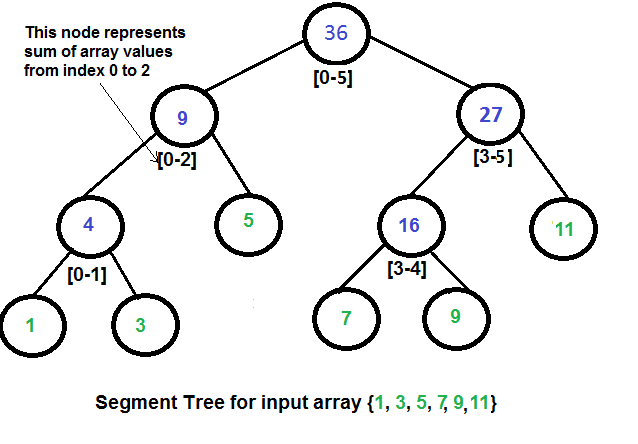

* Мы можем отложить некоторые обновления (избежать рекурсивных вызовов в update) и делать такие обновления только при необходимости, когда есть несколько обновлений и выполняются обновления в диапазоне.

* Узел в дереве сегментов хранит или отображает результаты запроса для различных индексов.

* Кроме того, все потомки узла также должны быть обновлены, если диапазон операции обновления включает этот узел.
- - В качестве примера возьмем узел со значением 27 на рисунке выше.
Этот узел содержит сумму значений по индексам от 3 до 5. Этот узел и все его потомки должны быть обновлены, если наш запрос на обновление охватывает диапазон от 2 до 5.
- - Сохраняя эту информацию об обновлениях в отдельных узлах, называемых отложенными узлами или значениями, мы используем отложенное распространение для обновления только узла со значением 27 и задержки обновлений для его потомков.

* Мы создаем массив с именем lazy[], который заменяет ленивый узел. Размер lazy[] такой же, как и массив, используемый для представления дерева сегментов в следующем коде, который называется tree[].

* Цель состоит в том, чтобы установить все lazy[elements] равными 0.
- - В узле дерева сегментов i нет ожидающих изменений, если lazy[i] имеет значение 0.
- - Ненулевое значение для lazy[i] указывает на то, что перед выполнением каких-либо запросов к узлу i в дереве сегментов эту сумму необходимо прибавить к узлу.

In [ ]:
# Program to show segment tree to
# demonstrate lazy propagation
MAX = 1000

# Ideally, we should not use global
# variables and large constant-sized
# arrays, we have done it here for
# simplicity.

# To store segment tree
tree = [0] * MAX

# To store pending updates
lazy = [0] * MAX

# si -> index of current node in segment tree
# ss and se -> Starting and ending
# indices of elements for which current
# nodes stores sum.
# us and ue -> starting and ending indexes
# of update query
# diff -> which we need to add in the
# range us to ue


def updateRangeUtil(si, ss, se, us, ue, diff):

    # If lazy value is non-zero for
    # current node of segment tree, then
    # there are some pending updates. So,
    # we need to make sure that the
    # pending updates are done before
    # making new updates. Because this
    # value may be used by parent after
    # recursive calls (See last line
    # of this function)
    if lazy[si] != 0:

        # Make pending updates using
        # value stored in lazy nodes
        tree[si] += (se - ss + 1) * lazy[si]

        # checking if it is not leaf node
        # because if it is leaf node then
        # we cannot go further
        if ss != se:

                        # We can postpone updating
            # children we don't need
            # their new values now. Since
            # we are not yet updating
            # children of si, we need to
            # set lazy flags for the children
            lazy[si * 2 + 1] += lazy[si]
            lazy[si * 2 + 2] += lazy[si]

        # Set the lazy value for current
        # node as 0 as it has been updated
        lazy[si] = 0

    # out of range
    if ss > se or ss > ue or se < us:
        return

    # Current segment is fully in range
    if ss >= us and se <= ue:

        # Add the difference to
        # current node
        tree[si] += (se - ss + 1) * diff

        # Same logic for checking
        # leaf node or not
        if ss != se:

            # This is where we store
            # values in lazy nodes,
            # rather than updating the
            # segment tree itself Since
            # we don't need these updated
            # values now we postpone
            # updates by storing values
            # in lazy[]
            lazy[si * 2 + 1] += diff
            lazy[si * 2 + 2] += diff
        return

    # If not completely in rang,
    # but overlaps, recur for children,
    mid = (ss + se) // 2
    updateRangeUtil(si * 2 + 1, ss, mid, us, ue, diff)
    updateRangeUtil(si * 2 + 2, mid + 1, se, us, ue, diff)

    # And use the result of children
    # calls to update this node
    tree[si] = tree[si * 2 + 1] + tree[si * 2 + 2]

# Function to update a range of values
# in segment tree
# us and eu -> starting and ending
# indices of update query
# ue -> ending index of update query
# diff -> which we need to add in the
# range us to ue


def updateRange(n, us, ue, diff):
    updateRangeUtil(0, 0, n - 1, us, ue, diff)

# A recursive function to get the sum of
# values in given range of the array.
# The following are parameters for this function.
# si --> Index of current node in the st.
# Initially 0 is passed as root is always
# at' index 0
# ss & se --> Starting and ending indices
# of the segment represented by current
# node, i.e., tree[si]
# qs & qe --> Starting and ending
# indices of query range


def getSumUtil(ss, se, qs, qe, si):

    # If lazy flag is set for current
    # node of segment tree, then there
    # are some pending updates. So we
    # need to make sure that the pending
    # updates are done before
    # processing the sub sum query
    if lazy[si] != 0:

        # Make pending updates to this
        # node. Note that this node
        # represents sum of elements in
        # arr[ss..se]  and all these
        # elements must be increased by
        # lazy[si]
        tree[si] += (se - ss + 1) * lazy[si]

        # Checking if it is not leaf node
        # because if it is leaf node then
        # we cannot go further
        if ss != se:

            # Since we are not yet
            # updating children os si,
            # we need to set lazy values
            # for the children
            lazy[si * 2 + 1] += lazy[si]
            lazy[si * 2 + 2] += lazy[si]

        # unset the lazy value for current
        # node as it has been updated
        lazy[si] = 0

    # Out of range
    if ss > se or ss > qe or se < qs:
        return 0

    # At this point we are sure that
    # pending lazy updates are done for
    # current node. So we can return
    # value

    # If this segment lies in range
    if ss >= qs and se <= qe:
        return tree[si]

    # If a part of this segment overlaps
    # with the given range
    mid = (ss + se) // 2
    return (getSumUtil(ss, mid, qs, qe, 2 * si + 1)
            + getSumUtil(mid + 1, se, qs, qe, 2 * si + 2))

# Return sum of elements in range from
# index qs (query start) to qe (query end).
# It mainly uses getSumUtil()


def getSum(n, qs, qe):

    # Check for erroneous input values
    if qs < 0 or qe > n - 1 or qs > qe:
        print("Invalid Input")
        return -1
    return getSumUtil(0, n - 1, qs, qe, 0)

# A recursive function that constructs
# Segment Tree for array[ss..se].
# si is index of current node in st.


def constructSTUtil(arr, ss, se, si):

    # Out of range as ss can never
    # be greater than se
    if ss > se:
        return

    # If there is one element in array,
    # store it in current node of segment
    # tree and return
    if ss == se:
        tree[si] = arr[ss]
        return

        # If there are more than one elements,
    # then recur for left and right
    # subtrees and store the sum of
    # values in this node
    mid = (ss + se) // 2
    constructSTUtil(arr, ss, mid, si * 2 + 1)
    constructSTUtil(arr, mid + 1, se, si * 2 + 2)
    tree[si] = tree[si * 2 + 1] + tree[si * 2 + 2]

# Function to construct segment tree
# from given array.This function allocates
# memory for segment tree and calls
# constructSTUtil() to fill the
# allocated memory


def constructST(arr, n):
    # Fill the allocated memory st
    constructSTUtil(arr, 0, n - 1, 0)


# Driver program to test above functions
arr = [1, 3, 5, 7, 9, 11]
n = len(arr)

# Build segment tree from given array
constructST(arr, n)

# Print sum of values in array
# from index 1 to 3
print(f"Sum of values in given range = {getSum(n, 1, 3)}")

# Add 10 to all nodes at indexes
# from 1 to 5.
updateRange(n, 1, 5, 10)

# Find sum after the value is updated
print(f"Updated sum of values in given range = {getSum(n, 1, 3)}")


Sum of values in given range = 15
Updated sum of values in given range = 45


Временная сложность: $O(N)$  
Вспомогательное пространство: $O(MAX)$

**Приложение:**
* Планирование интервалов: деревья сегментов можно использовать для эффективного планирования неперекрывающихся интервалов, таких как планирование встреч или распределение ресурсов.

* Статистика на основе диапазонов: деревья сегментов можно использовать для вычисления статистики на основе диапазона, такой как дисперсия, стандартное отклонение и процентили.

* Обработка изображений: Деревья сегментов используются в алгоритмах обработки изображений для разделения изображения на сегменты на основе цвета, текстуры или других атрибутов.

**Преимущества:**
* Эффективные запросы: деревья сегментов можно использовать для эффективного ответа на запросы о минимальном, максимальном, сумме или другом агрегированном значении диапазона элементов в массиве.

* Эффективные обновления: Деревья сегментов можно использовать для эффективного обновления диапазона элементов в массиве, например, для увеличения или уменьшения диапазона значений.

* Гибкость: деревья сегментов можно использовать для решения широкого спектра проблем, связанных с запросами и обновлениями диапазонов.

**Недостатки:**  
* Сложность: Деревья сегментов могут быть сложными в реализации и обслуживании, особенно для больших массивов или многомерных данных.

* Временная сложность: Временная сложность операций с деревом сегментов, таких как построение, обновление и запрос, равна O(log N) , что выше, чем у некоторых других структур данных, таких как дерево Фенвика.
* Пространственная сложность: Пространственная сложность сегментного дерева равна O(4N), что относительно высоко.


## AVL Tree

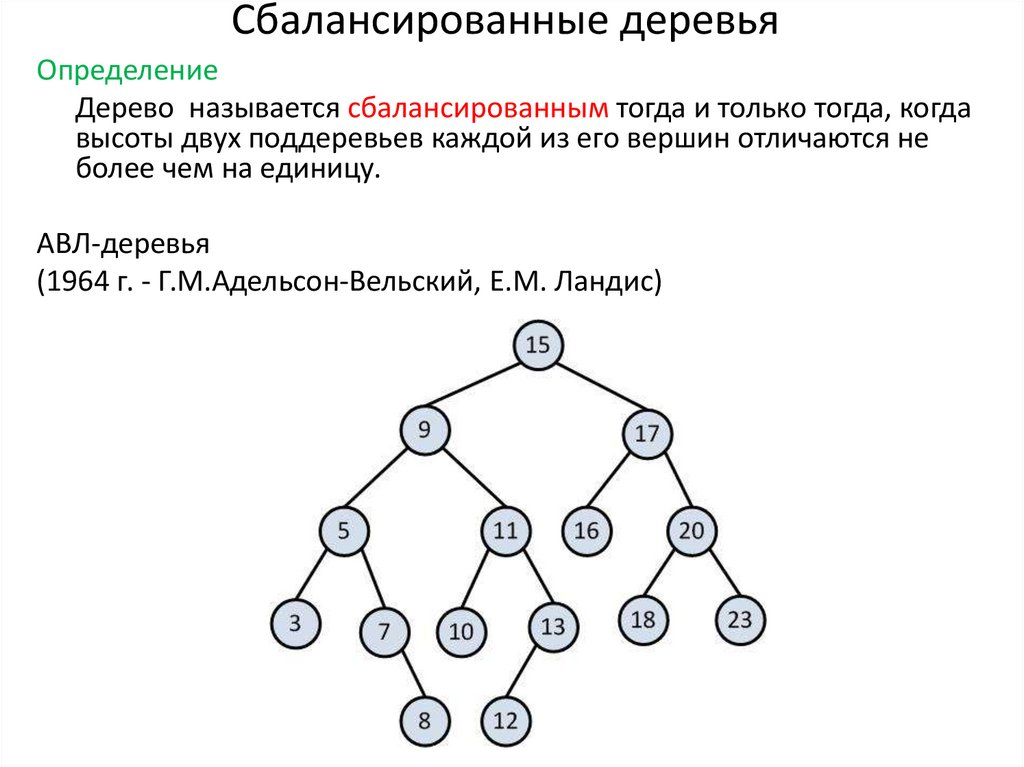

**AVL-дерево** определяется как **самобалансирующееся двоичное дерево поиска (BST)**, в котором разница между высотами левого и правого поддеревьев для любого узла не может быть больше одного.

* Абсолютная разница между высотами левого и правого поддеревьев для любого узла известна как **коэффициент баланса узла**. Коэффициент баланса для всех узлов должен быть меньше или равен 1.

* Каждое дерево AVL также является двоичным деревом поиска (значения левого поддерева меньше и значения правого поддерева терты для каждого узла), но каждое BST не является деревом AVL. Например, вторая диаграмма ниже не является AVL-деревом.

* Основное преимущество AVL-дерева заключается в том, что временная сложность всех операций (поиск, вставка и удаление, максимум, минимум, пол и потолок) становится $O(Log n)$. Это происходит потому, что высота дерева AVL ограничена $O(Log n)$. В случае нормального BST высота может увеличиваться до $O(n)$.

* Дерево AVL сохраняет свою высоту, выполняя некоторую дополнительную работу во время операций вставки и удаления. В основном он использует вращение для поддержания как свойств BST, так и баланса высоты.

* Существуют и другие самобалансирующиеся BST, такие как **Red Black Tree**. Красное черное дерево является более сложным, но чаще используется на практике, поскольку оно менее ограничивающее с точки зрения разницы в высоте левого и правого поддерева.

**Пример дерева AVL:**
Коэффициенты баланса для разных узлов: 12:1, 8:1, 18:1, 5:1, 11:0, 17:0 и 4:0. Поскольку все разности меньше или равны 1, дерево является AVL-деревом.

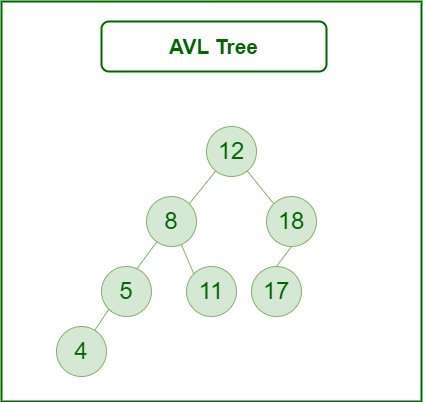

**Пример BST, который НЕ является AVL:**
Приведенное ниже дерево НЕ является деревом AVL, так как коэффициент баланса для узлов 8, 4 и 7 больше 1.

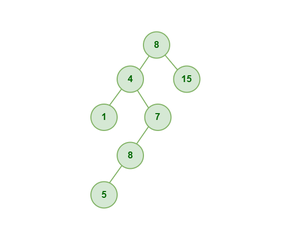

**Операции с AVL-деревом:**  
* **Поиск**: Это то же самое, что и обычное двоичное дерево поиска (BST), поскольку AVL-дерево всегда является BST. Таким образом, мы можем использовать ту же реализацию, что и BST. Преимущество здесь в том, что временная сложность равна O(Log n)

* **Вставка**: Он выполняет вращения вместе с обычной вставкой BST, чтобы убедиться, что коэффициент баланса затронутых узлов меньше или равен 1 после установки

* **Удаление**: Он также выполняет вращения вместе с обычным делированием BST, чтобы убедиться, что коэффициент баланса затронутых узлов меньше или равен 1 после удаления.

Вращение поддеревьев (используется при вставке и удалении)
Дерево AVL может поворачиваться одним из следующих четырех способов, чтобы сохранять баланс и при этом сохранять свойства BST.

### Вращение влево

Когда узел добавляется в правое поддерево правого поддерева, если дерево выходит из равновесия, мы делаем один поворот влево.

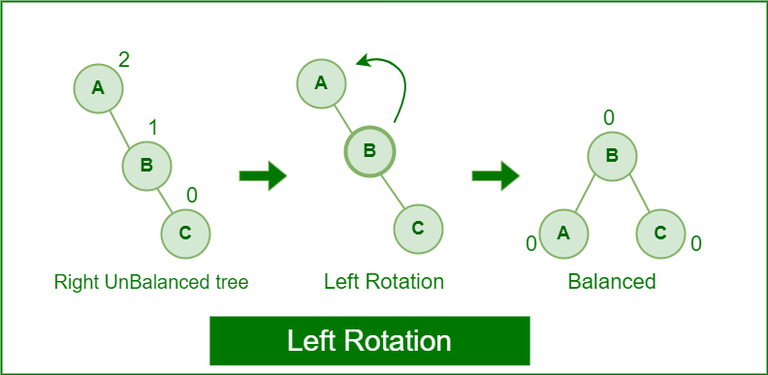

### Вращение вправо
Если узел добавляется в левое поддерево левого поддерева, то AVL-дерево может выйти из равновесия, делаем один поворот вправо.

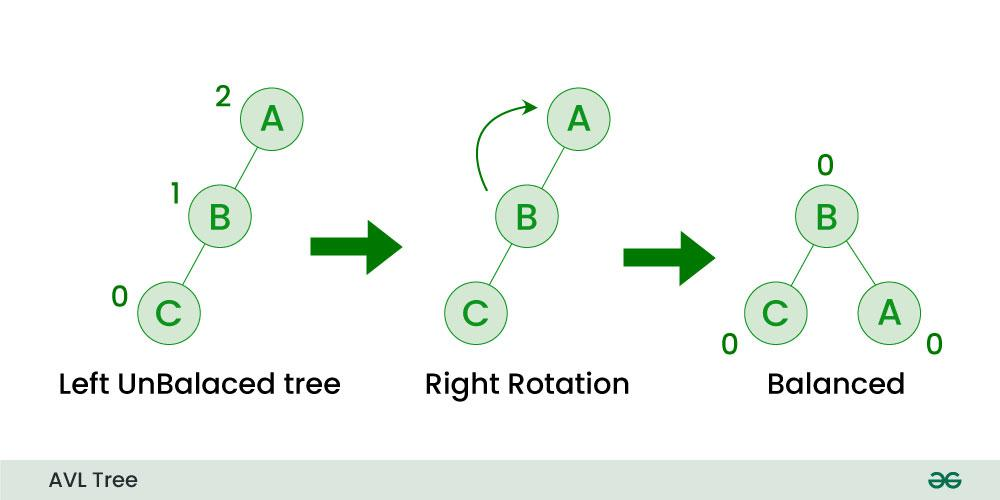

### Вращение влево-вправо

Вращение влево-вправо — это комбинация, в которой первое вращение влево происходит после того, как выполняется это вращение вправо.

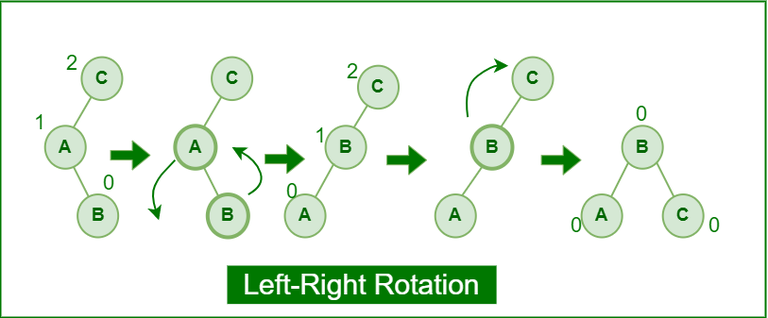

### Вращение вправо-влево

Вращение вправо-влево — это комбинация, в которой первое вращение вправо происходит после этого вращения влево.

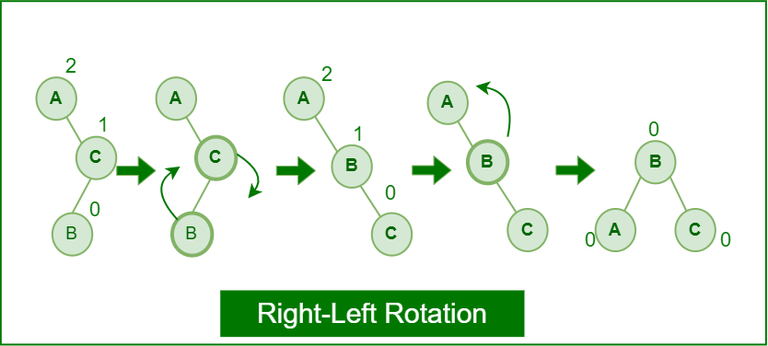

**Преимущества AVL Tree:**  
* AVL-деревья могут самобалансироваться и, следовательно, обеспечивают временную сложность в виде O(Log n) для поиска, вставки и удаления.

* Это только BST (с балансировкой), поэтому элементы могут быть отсортированы в порядке.

* Поскольку правила балансировки строгие по сравнению с Red Black Tree, деревья AVL в целом имеют относительно меньшую высоту и, следовательно, поиск происходит быстрее.

* Дерево AVL относительно менее сложно для понимания и реализации по сравнению с Red Black Trees.

**Недостатки AVL Tree:**  

* Он сложен в реализации по сравнению с обычным BST и проще по сравнению с Red Black

* Используется реже по сравнению с красно-черными деревьями. Благодаря довольно строгому балансу, деревья AVL обеспечивают сложные операции вставки и удаления, так как выполняется больше вращений.

**Области применения AVL Tree:**
* AVL Tree используется в качестве первого примера самобалансировки BST в обучении DSA, поскольку его легче понять и реализовать по сравнению с Red Black

* Приложения, где вставки и удаления встречаются реже, но часто ищут данные наряду с другими операциями BST, такими как сортированное обход, пол, ceil, min и max.

* Red Black tree чаще всего реализуется в таких языковых библиотеках, как map в C++, set в C++, TreeMap в Java и TreeSet в Java.
Деревья AVL можно использовать в среде реального времени, где требуется предсказуемая и стабильная производительность.

### Вставка в AVL-дерево  




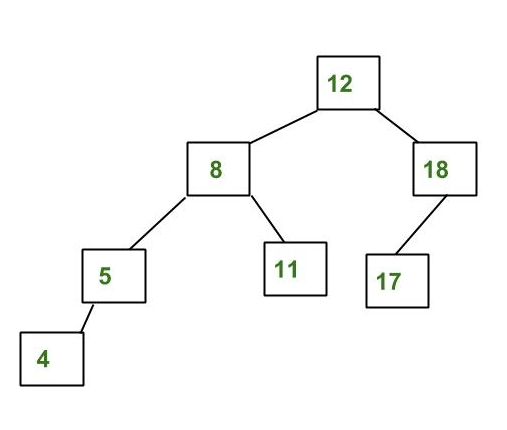


**Почему AVL Trees?**  
Большинство операций BST (например, поиск, максимум, минимум, вставка, удаление, пол и потолок) занимают $O(h)$ времени, где $h$ — высота BST. Стоимость этих операций может стать $O(n)$ для асимметричного двоичного дерева. Если мы убедимся, что высота дерева остается $O(log(n))$ после каждой вставки и удаления, то мы можем гарантировать верхнюю границу $O(log(n))$ для всех этих операций. Высота AVL-дерева всегда равна $O(log(n))$, где $n$ — количество узлов в дереве.

**Вставка в AVL-дерево:**  
Чтобы убедиться, что данное дерево остается AVL после каждой вставки, мы должны дополнить стандартную операцию вставки BST для выполнения некоторой перебалансировки. Ниже приведены две основные операции, которые могут быть выполнены для балансировки BST без нарушения свойства BST (keys(слева) < key(root) < keys(right)).

* Вращение влево
* Вращение вправо

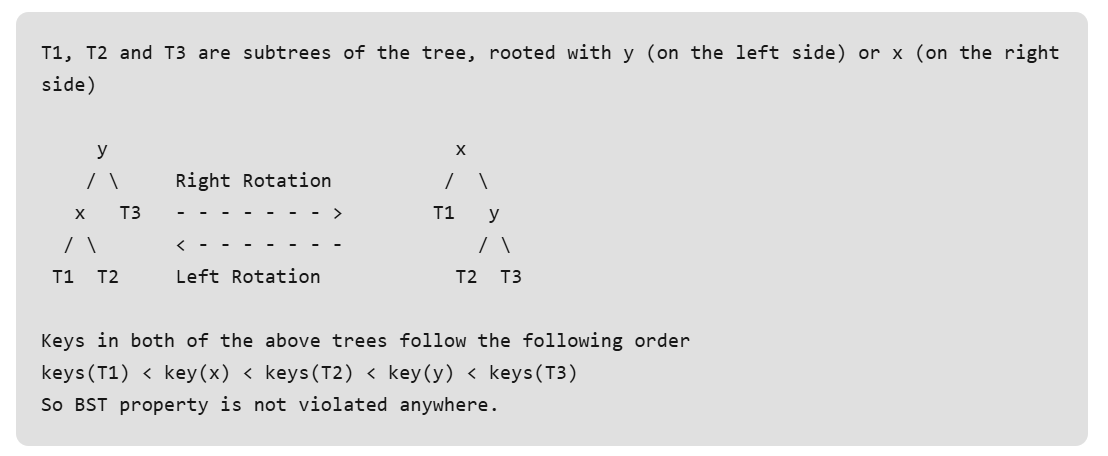

Шаги, которые необходимо выполнить для введения:

Пусть вновь вставленный узел будет w

* Выполнить стандартную вставку BST для w.
* Начиная с w, двигайтесь вверх и найдите первый несбалансированный узел. Пусть z — первый неуравновешенный узел, y — дочерний элемент z, идущий по пути от w к z, а x — внук z, который идет по пути от w до z.
* Восстановите равновесие дерева, выполнив соответствующие вращения на поддереве, корнем которого является z. Существует 4 возможных случая, которые необходимо обработать, так как x, y и z могут быть организованы 4 способами.

* Ниже приведены 4 возможных варианта расстановки:
- - y — левый дочерний элемент z, а x — левый дочерний элемент y (левый левый случай)
- - y — левый дочерний элемент z, а x — правый дочерний элемент y (левый правый случай)
- - y является правым потомком z, а x является правым потомком y (Right Right Case)
- - y — правый дочерний элемент z, а x — левый дочерний элемент y (правый левый случай)

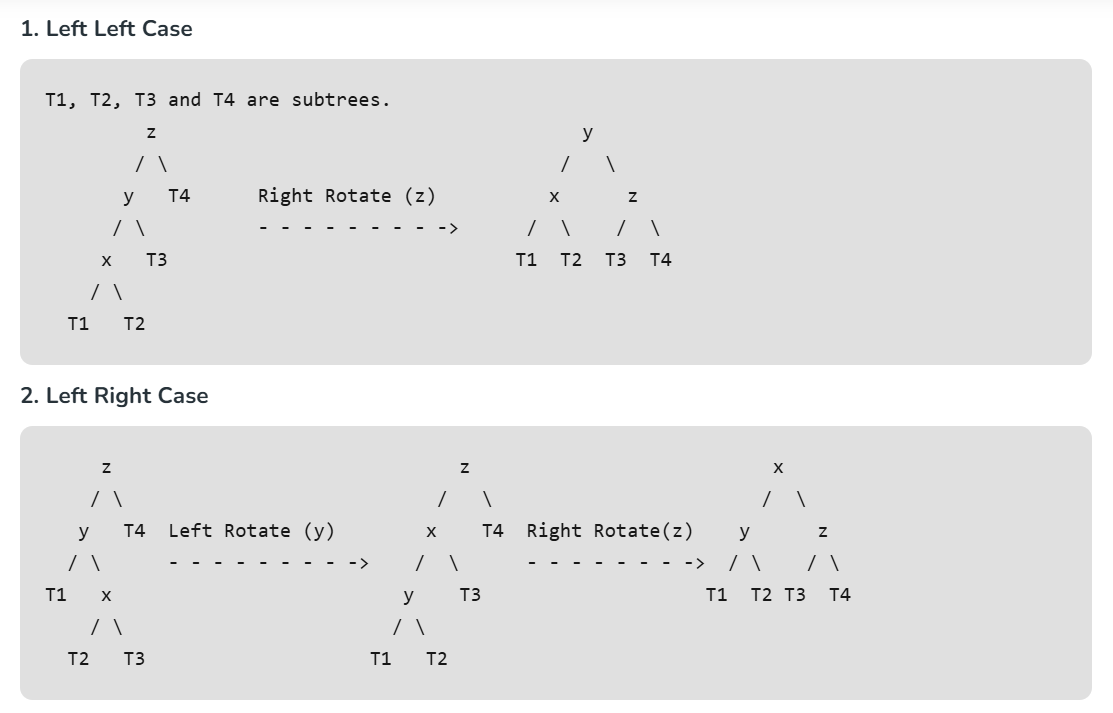

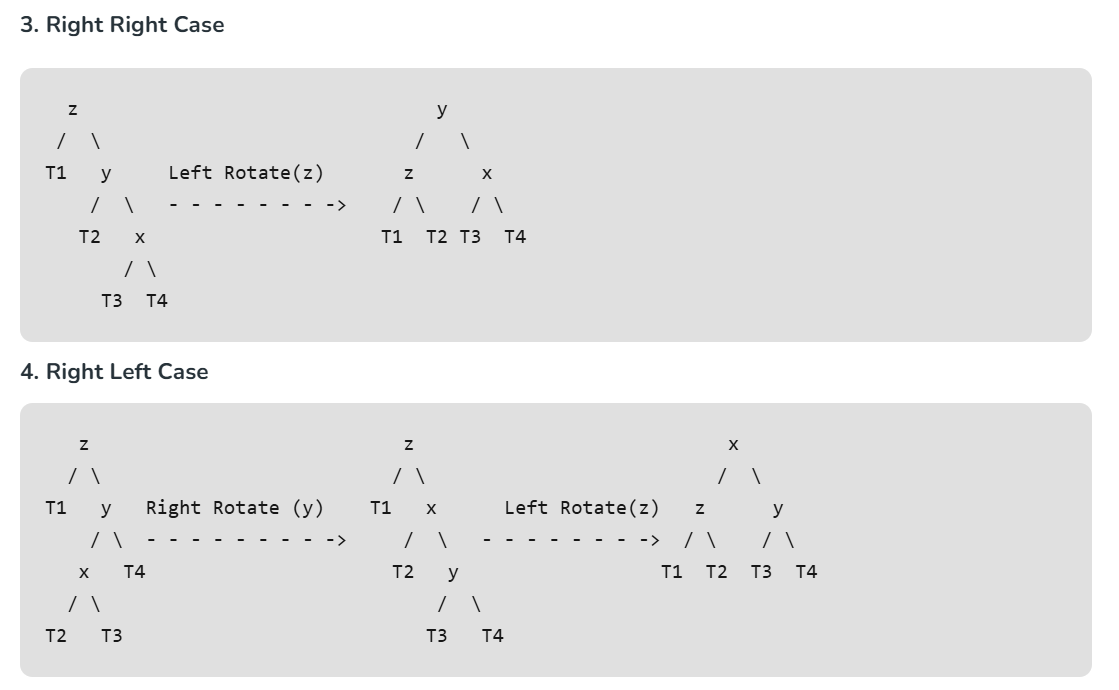

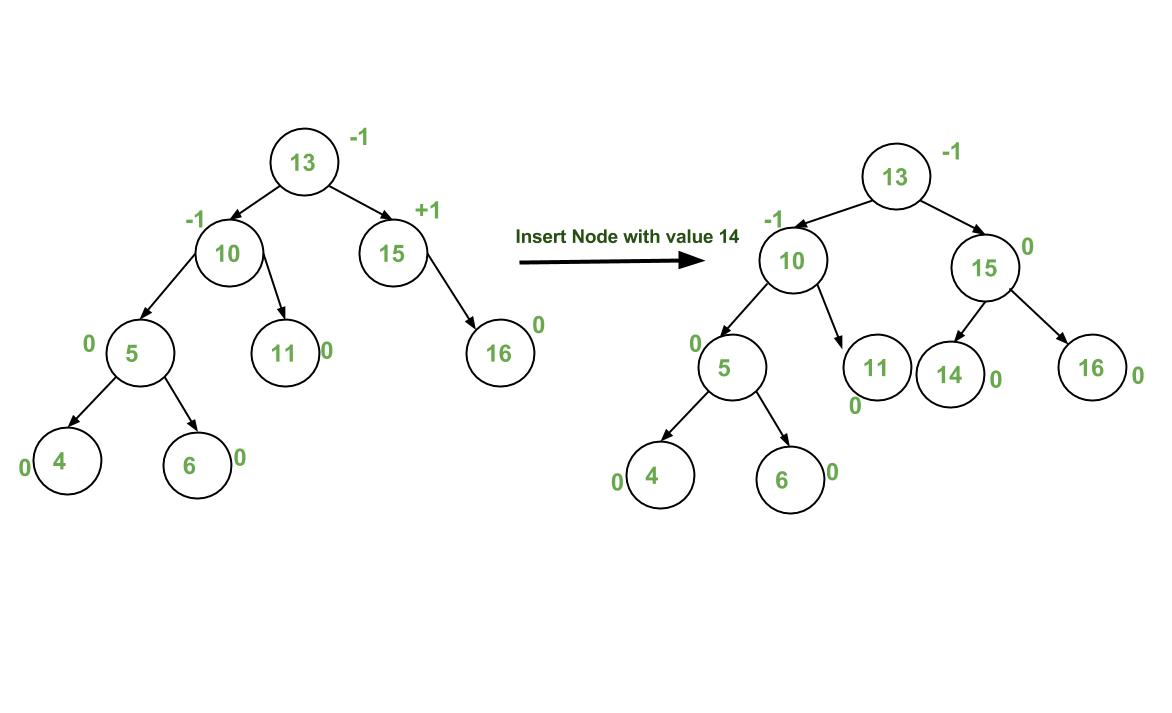

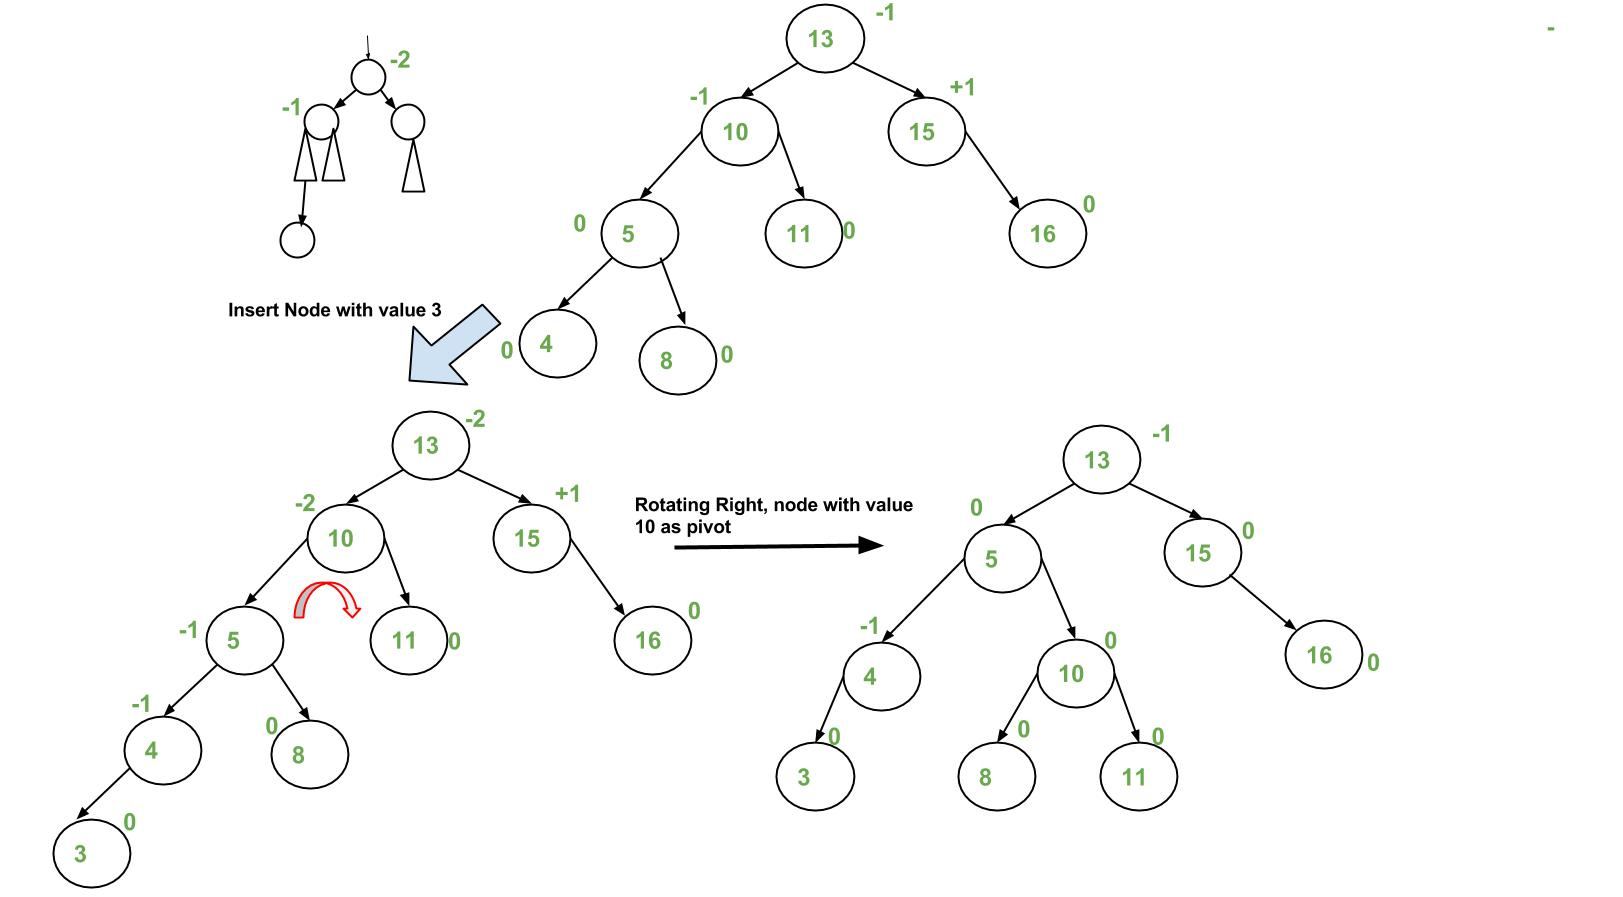

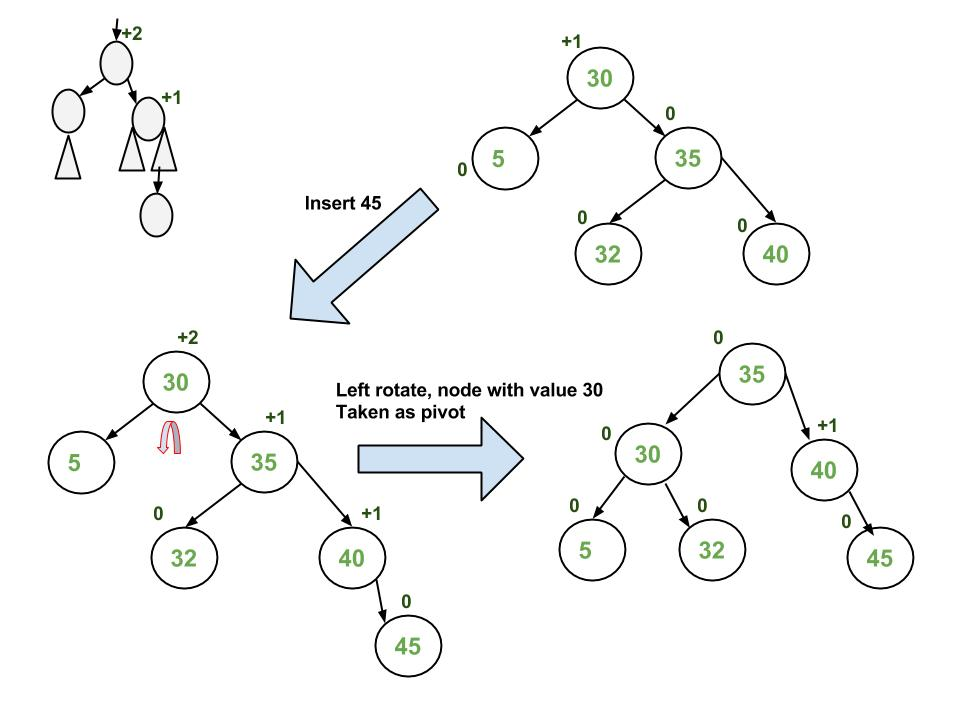

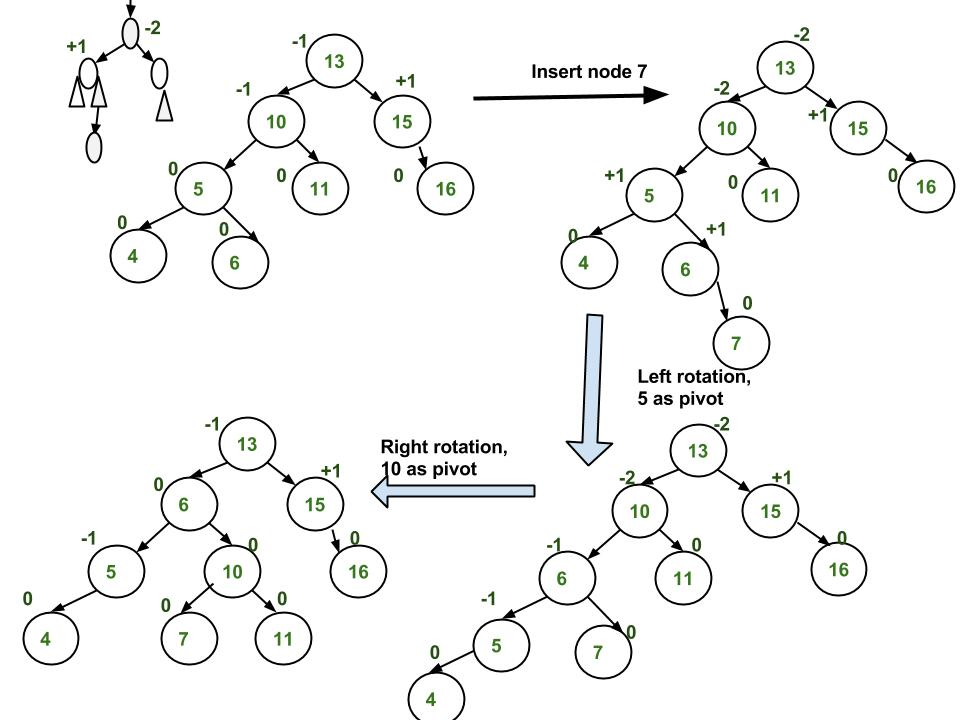

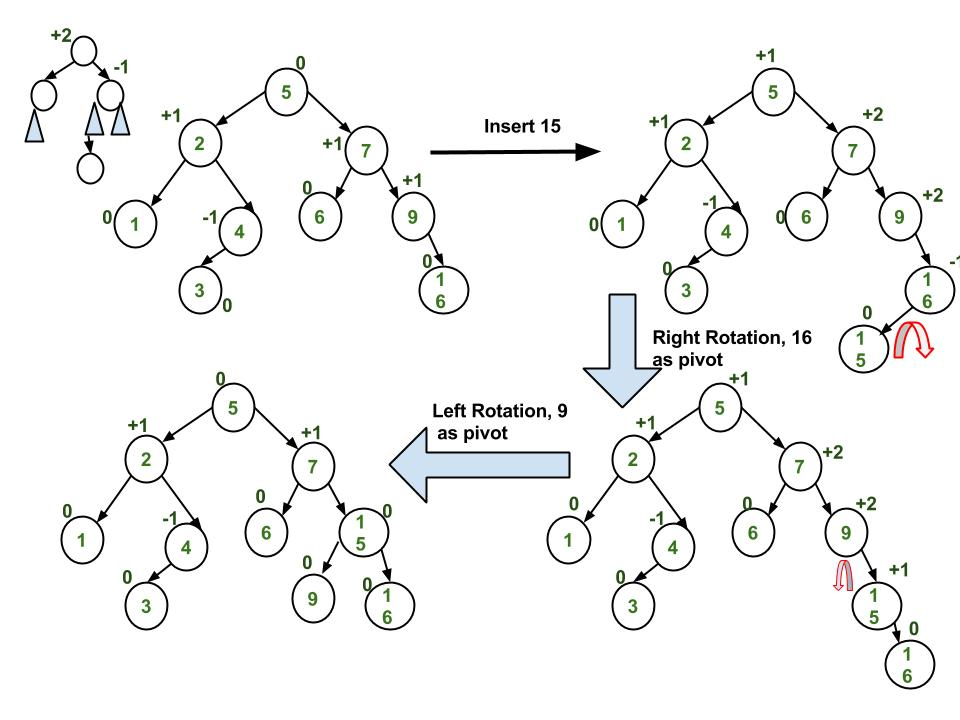

In [ ]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

# A utility function to get the
# height of the tree
def height(node):
    if not node:
        return 0
    return node.height

# A utility function to right rotate
# subtree rooted with y
def right_rotate(y):
    x = y.left
    T2 = x.right

    # Perform rotation
    x.right = y
    y.left = T2

    # Update heights
    y.height = 1 + max(height(y.left), height(y.right))
    x.height = 1 + max(height(x.left), height(x.right))

    # Return new root
    return x

# A utility function to left rotate
# subtree rooted with x
def left_rotate(x):
    y = x.right
    T2 = y.left

    # Perform rotation
    y.left = x
    x.right = T2

    # Update heights
    x.height = 1 + max(height(x.left), height(x.right))
    y.height = 1 + max(height(y.left), height(y.right))

    # Return new root
    return y

# Get balance factor of node N
def get_balance(node):
    if not node:
        return 0
    return height(node.left) - height(node.right)

# Recursive function to insert a key in
# the subtree rooted with node
def insert(node, key):

    # Perform the normal BST insertion
    if not node:
        return Node(key)

    if key < node.key:
        node.left = insert(node.left, key)
    elif key > node.key:
        node.right = insert(node.right, key)
    else:
        # Equal keys are not allowed in BST
        return node

    # Update height of this ancestor node
    node.height = 1 + max(height(node.left), height(node.right))

    # Get the balance factor of this ancestor node
    balance = get_balance(node)

    # If this node becomes unbalanced,
    # then there are 4 cases

    # Left Left Case
    if balance > 1 and key < node.left.key:
        return right_rotate(node)

    # Right Right Case
    if balance < -1 and key > node.right.key:
        return left_rotate(node)

    # Left Right Case
    if balance > 1 and key > node.left.key:
        node.left = left_rotate(node.left)
        return right_rotate(node)

    # Right Left Case
    if balance < -1 and key < node.right.key:
        node.right = right_rotate(node.right)
        return left_rotate(node)

    # Return the (unchanged) node pointer
    return node

# A utility function to print preorder
# traversal of the tree
def pre_order(root):
    if root:
        print(root.key, end=" ")
        pre_order(root.left)
        pre_order(root.right)

# Driver code
root = None

# Constructing tree given in the above figure
root = insert(root, 10)
root = insert(root, 20)
root = insert(root, 30)
root = insert(root, 40)
root = insert(root, 50)
root = insert(root, 25)

# The constructed AVL Tree would be
#        30
#       /  \
#      20   40
#     /  \    \
#    10  25   50

print("Preorder traversal :")
pre_order(root)


Preorder traversal :
30 20 10 25 40 50 

Временная сложность: $O(log(n))$,
Для вспомогательного пространства вставки: $O(Log (n))$ для стека рекурсионных вызовов, поскольку мы написали рекурсивный метод для вставки

### Удаление в дереве AVL  

Шаги, которые необходимо выполнить для удаления.
Чтобы убедиться, что данное дерево остается AVL после каждого удаления, мы должны дополнить стандартную операцию удаления BST для выполнения некоторой перебалансировки. Ниже приведены две основные операции, которые могут быть выполнены для восстановления баланса BST без нарушения свойства BST (keys(left) < key(root) < keys(right)).

* Вращение влево
* Вращение вправо

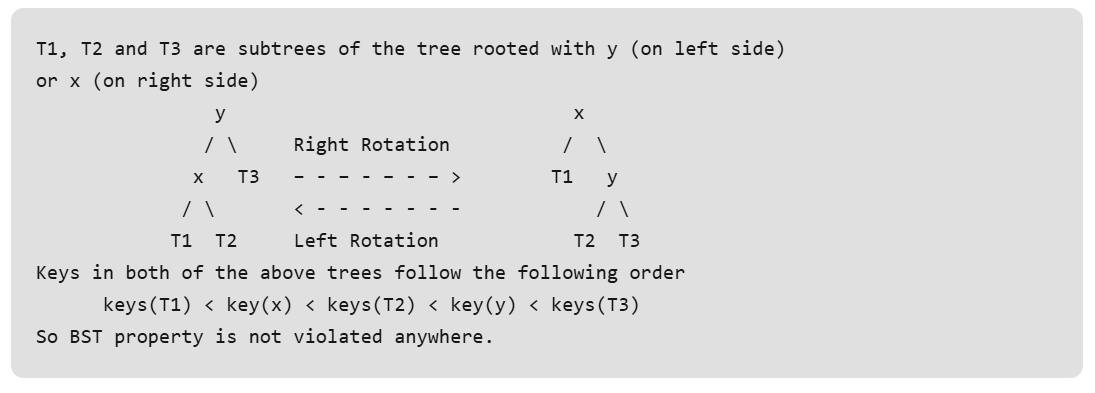

Пусть w — узел, который нужно удалить

* Выполните стандартное удаление BST для w.
* Начиная с w, двигайтесь вверх и найдите первый несбалансированный узел. Пусть z — первый неуравновешенный узел, y — потомок z большей высоты, а x — дочерний элемент y большей высоты. Обратите внимание, что определения x и y отличаются от вставки здесь.
* Восстановите равновесие дерева, выполнив соответствующие вращения на поддереве, корнем которого является z. Может быть 4 возможных случая, которые необходимо обработать, поскольку x, y и z могут быть организованы 4 способами. Ниже приведены 4 возможных варианта расстановки:
1. y - левый дочерний элемент z, а x - левый дочерний элемент y (левый левый регистр)
2. y — левый дочерний элемент z, а x — правый дочерний элемент y (левый правый случай)
3. y является правым потомком z, а x является правым потомком y (Right Right Case)
4. y — правый дочерний элемент z, а x — левый дочерний элемент y (правый левый случай)
Как и при введении, ниже приведены операции, которые должны быть выполнены в вышеупомянутых 4 случаях. Обратите внимание, что, в отличие от вставки, исправление узла z не исправит полное дерево AVL. После исправления z, нам, возможно, придется исправить и предков z

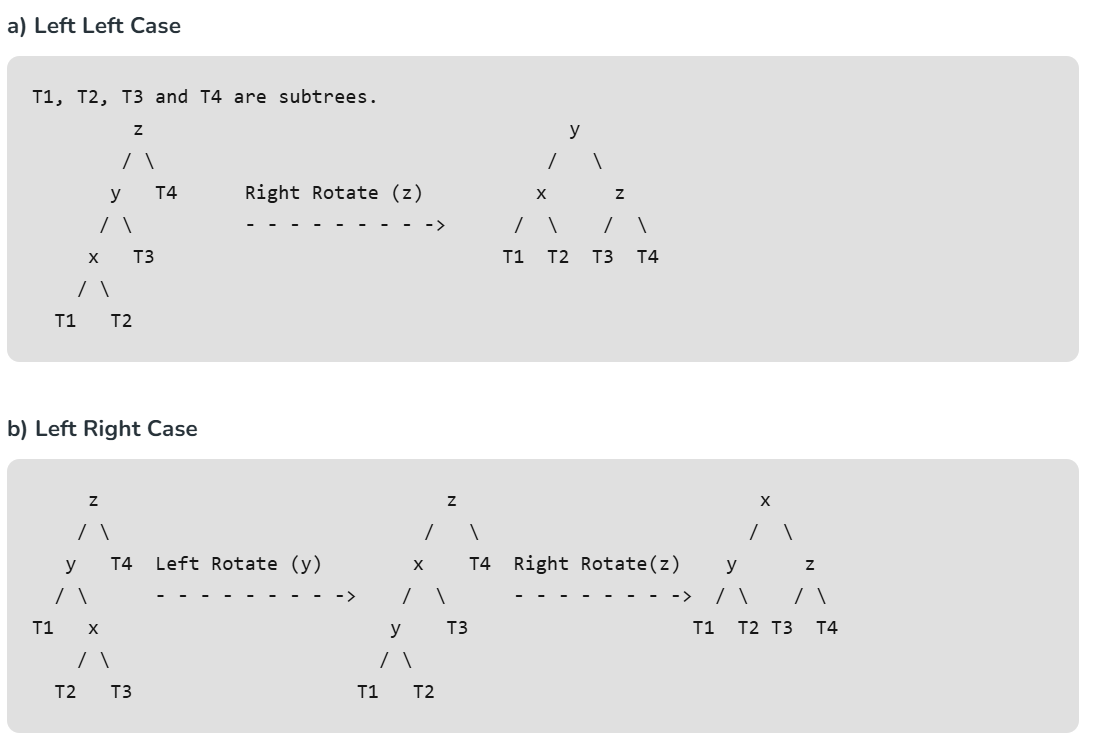

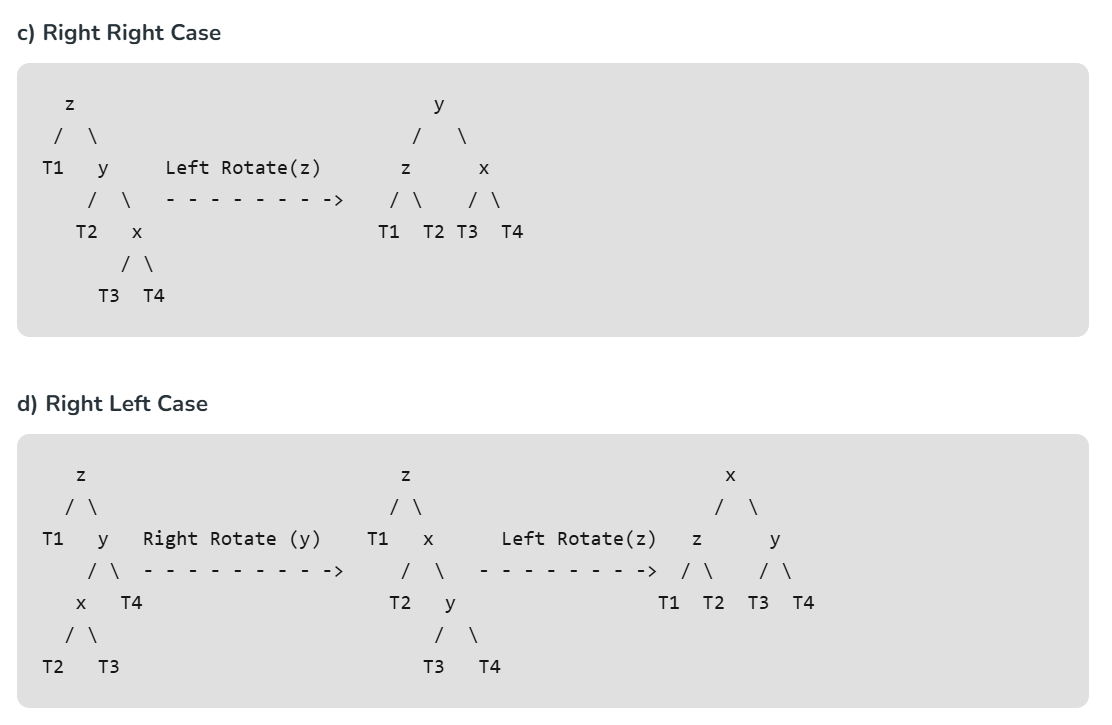

В отличие от вставки, при удалении, после того как мы выполняем вращение в точке z, нам, возможно, придется выполнить вращение в точках предков z. Таким образом, мы должны продолжать прослеживать путь, пока не дойдем до корня.

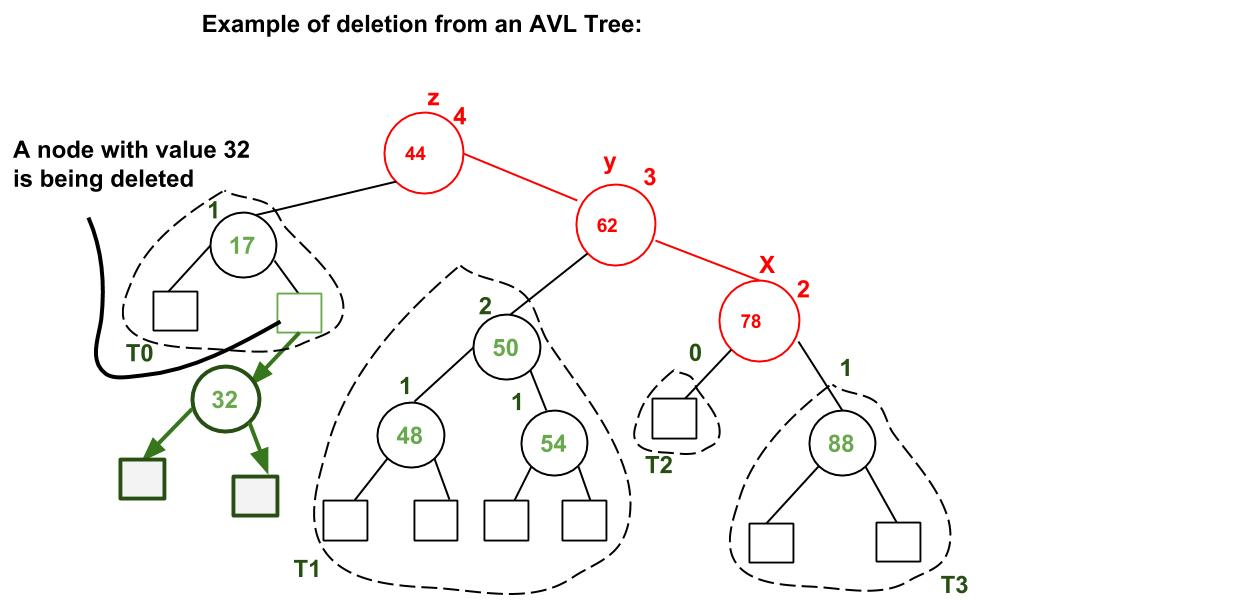

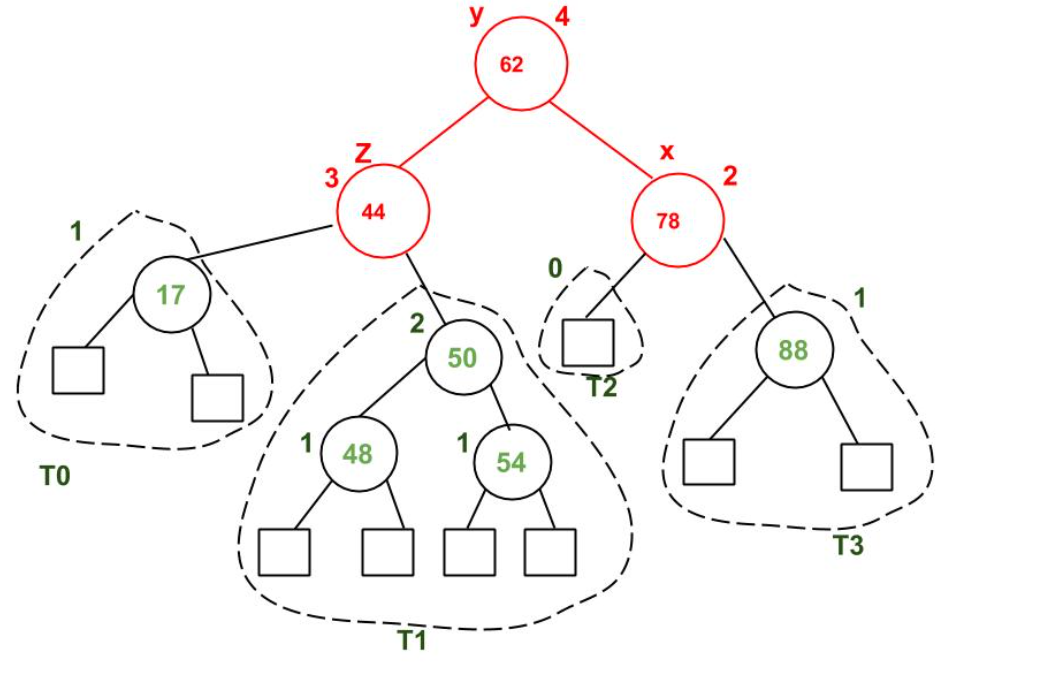

Узел со значением 32 удаляется. После удаления 32 мы поднимаемся вверх и находим первый несбалансированный узел, которым является 44. Мы обозначаем его как z, его более высокий дочерний элемент — как y, который равен 62, а более высокий дочерний элемент y — как x, который может быть либо 78, либо 50, поскольку оба имеют одинаковый рост. Мы рассмотрели 78. Теперь корпус находится в положении «Вправо Вправо», поэтому выполняем вращение влево.


Ниже приведена реализация удаления AVL-дерева. В следующей реализации в качестве основы используется рекурсивное удаление BST. При рекурсивном удалении BST после удаления мы получаем указатели на всех предков один за другим снизу вверх. Таким образом, нам не нужен родительский указатель (или ссылка) для продвижения вверх. Рекурсивный код сам путешествует вверх и посещает всех предков удаленного узла.

* Выполните обычное удаление BST.
* Текущий узел должен быть одним из предков удаленного узла. Обновите высоту текущего узла.
* Получаем коэффициент баланса (высота левого поддерева – высота правого поддерева) текущего узла.
* Если коэффициент баланса больше 1, то текущий узел несбалансирован и мы находимся либо в левом случае, либо в левом правом. Чтобы проверить, является ли это левым левым случаем или левым правым, получите коэффициент баланса левого поддерева. Если коэффициент баланса левого поддерева больше или равен 0, то это левый левый случай, иначе левый правый случай.

* Если коэффициент баланса меньше -1, то текущий узел не сбалансирован и мы находимся либо в случае Справа Справа, либо в Справа Слева. Чтобы проверить, является ли это правым правым случаем или правым левым случаем, получим коэффициент баланса правого поддерева. Если коэффициент равновесия правого поддерева меньше или равен 0, то это вариант Right Right, в противном случае Right Left.

In [ ]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

def height(N):
    if N is None:
        return 0
    return N.height

def right_rotate(y):
    x = y.left
    T2 = x.right

    # Perform rotation
    x.right = y
    y.left = T2

    # Update heights
    y.height = max(height(y.left),
                   height(y.right)) + 1
    x.height = max(height(x.left),
                   height(x.right)) + 1

    # Return new root
    return x

def left_rotate(x):
    y = x.right
    T2 = y.left

    # Perform rotation
    y.left = x
    x.right = T2

    # Update heights
    x.height = max(height(x.left),
                   height(x.right)) + 1
    y.height = max(height(y.left),
                   height(y.right)) + 1

    # Return new root
    return y

def get_balance(N):
    if N is None:
        return 0
    return height(N.left) - height(N.right)

def insert(node, key):
    # 1. Perform the normal BST insertion
    if node is None:
        return Node(key)

    if key < node.key:
        node.left = insert(node.left, key)
    elif key > node.key:
        node.right = insert(node.right, key)
    else:  # Duplicate keys not allowed
        return node

    # 2. Update height of this ancestor node
    node.height = max(height(node.left),
                      height(node.right)) + 1

    # 3. Get the balance factor of this node
    # to check whether this node became
    # unbalanced
    balance = get_balance(node)

    # If this node becomes unbalanced, then
    # there are 4 cases

    # Left Left Case
    if balance > 1 and key < node.left.key:
        return right_rotate(node)

    # Right Right Case
    if balance < -1 and key > node.right.key:
        return left_rotate(node)

    # Left Right Case
    if balance > 1 and key > node.left.key:
        node.left = left_rotate(node.left)
        return right_rotate(node)

    # Right Left Case
    if balance < -1 and key < node.right.key:
        node.right = right_rotate(node.right)
        return left_rotate(node)

    return node

def min_value_node(node):
    current = node

    # loop down to find the leftmost leaf
    while current.left is not None:
        current = current.left

    return current

def delete_node(root, key):
    # STEP 1: PERFORM STANDARD BST DELETE
    if root is None:
        return root

    # If the key to be deleted is smaller
    # than the root's key, then it lies in
    # left subtree
    if key < root.key:
        root.left = delete_node(root.left, key)

    # If the key to be deleted is greater
    # than the root's key, then it lies in
    # right subtree
    elif key > root.key:
        root.right = delete_node(root.right, key)

    # if key is same as root's key, then
    # this is the node to be deleted
    else:
        # node with only one child or no child
        if root.left is None or root.right is None:
            temp = root.left if root.left else root.right

            # No child case
            if temp is None:
                root = None
            else:  # One child case
                root = temp

        else:
            # node with two children: Get the
            # inorder successor (smallest in
            # the right subtree)
            temp = min_value_node(root.right)

            # Copy the inorder successor's
            # data to this node
            root.key = temp.key

            # Delete the inorder successor
            root.right = delete_node(root.right, temp.key)

    # If the tree had only one node then return
    if root is None:
        return root

    # STEP 2: UPDATE HEIGHT OF THE CURRENT NODE
    root.height = max(height(root.left),
                      height(root.right)) + 1

    # STEP 3: GET THE BALANCE FACTOR OF THIS
    # NODE (to check whether this node
    # became unbalanced)
    balance = get_balance(root)

    # If this node becomes unbalanced, then
    # there are 4 cases

    # Left Left Case
    if balance > 1 and get_balance(root.left) >= 0:
        return right_rotate(root)

    # Left Right Case
    if balance > 1 and get_balance(root.left) < 0:
        root.left = left_rotate(root.left)
        return right_rotate(root)

    # Right Right Case
    if balance < -1 and get_balance(root.right) <= 0:
        return left_rotate(root)

    # Right Left Case
    if balance < -1 and get_balance(root.right) > 0:
        root.right = right_rotate(root.right)
        return left_rotate(root)

    return root

def pre_order(root):
    if root is not None:
        print("{0} ".format(root.key), end="")
        pre_order(root.left)
        pre_order(root.right)

# Driver Code
if __name__ == "__main__":
    root = None

    # Constructing tree given in the
    # above figure
    root = insert(root, 9)
    root = insert(root, 5)
    root = insert(root, 10)
    root = insert(root, 0)
    root = insert(root, 6)
    root = insert(root, 11)
    root = insert(root, -1)
    root = insert(root, 1)
    root = insert(root, 2)

    print("Preorder traversal of the "
          "constructed AVL tree is")
    pre_order(root)

    root = delete_node(root, 10)

    print("\nPreorder traversal after"
          " deletion of 10")
    pre_order(root)


Preorder traversal of the constructed AVL tree is
9 1 0 -1 5 2 6 10 11 
Preorder traversal after deletion of 10
1 0 -1 9 5 2 6 11 

**Временная сложность:** Операции поворота (вращение влево и вправо) занимают постоянное время, так как в них изменяется лишь несколько указателей. Обновление высоты и получение фактора баланса также требуют постоянного времени. Таким образом, временная сложность удаления AVL остается такой же, как и при удалении BST, которое равно $O(h)$, где $h$ — высота дерева. Поскольку дерево AVL сбалансировано, высота равна $O(log n)$. Таким образом, временная сложность удаления AVL равна $O(log n)$.  

**Вспомогательное пространство:** $O(log n)$ для стека рекурсионных вызовов, так как мы написали рекурсивный метод для удаления



**Сводка по деревьям AVL**

* Это самобалансирующиеся двоичные деревья поиска.
* Балансирующий фактор находится в диапазоне -1, 0 и +1.
* Когда балансировочный коэффициент выходит за пределы диапазона, необходимо выполнять вращения
* Время вставки, удаления и поиска равно $O(log N)$.
* Деревья AVL чаще всего используются там, где поиск происходит чаще по сравнению с операцией вставки и удаления.

## Красно-черное дерево

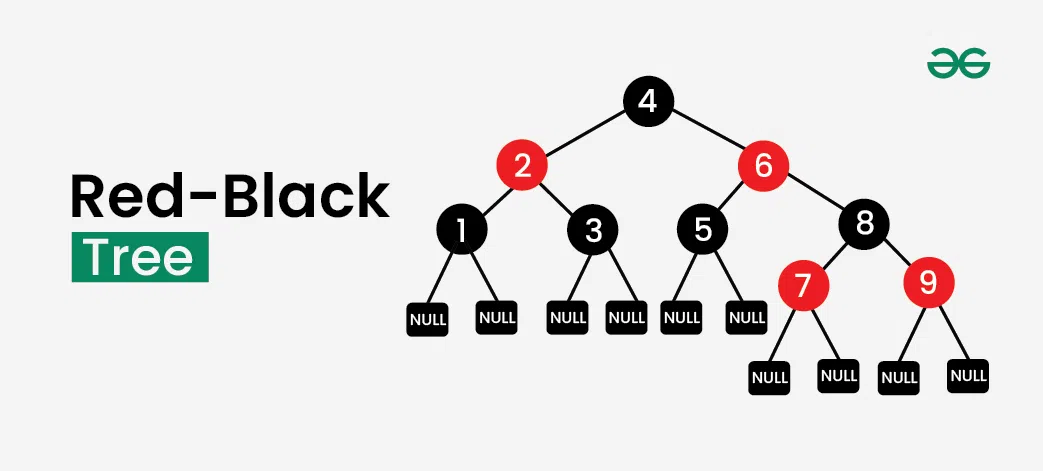

**Красно-черное дерево** — это самобалансирующееся двоичное дерево поиска, где каждый узел имеет дополнительный атрибут: цвет, который может быть как красным, так и черным. Основная цель этих деревьев — поддерживать баланс во время вставки и удаления, обеспечивая эффективное извлечение и обработку данных.

**Свойства красно-черных деревьев**
Красно-Черное Дерево обладает следующими свойствами:

* Цвет узла: Каждый узел имеет красный или черный цвет.
* Свойство корня: Корень дерева всегда черный.

* Свойство красного: красные узлы не могут иметь красных дочерних узлов (не может быть двух последовательных красных узлов ни на одном пути).

* Свойство Черного: Каждый путь от узла к его потомкам нулевым узлам (листьям) имеет одинаковое количество черных узлов.

* Свойство листа: Все листья (узлы NIL) черные.
Эти свойства гарантируют, что самый длинный путь от корня до любого листа будет не более чем в два раза длиннее самого короткого пути, сохраняя баланс дерева и эффективную работу.

Пример красно-черного дерева:

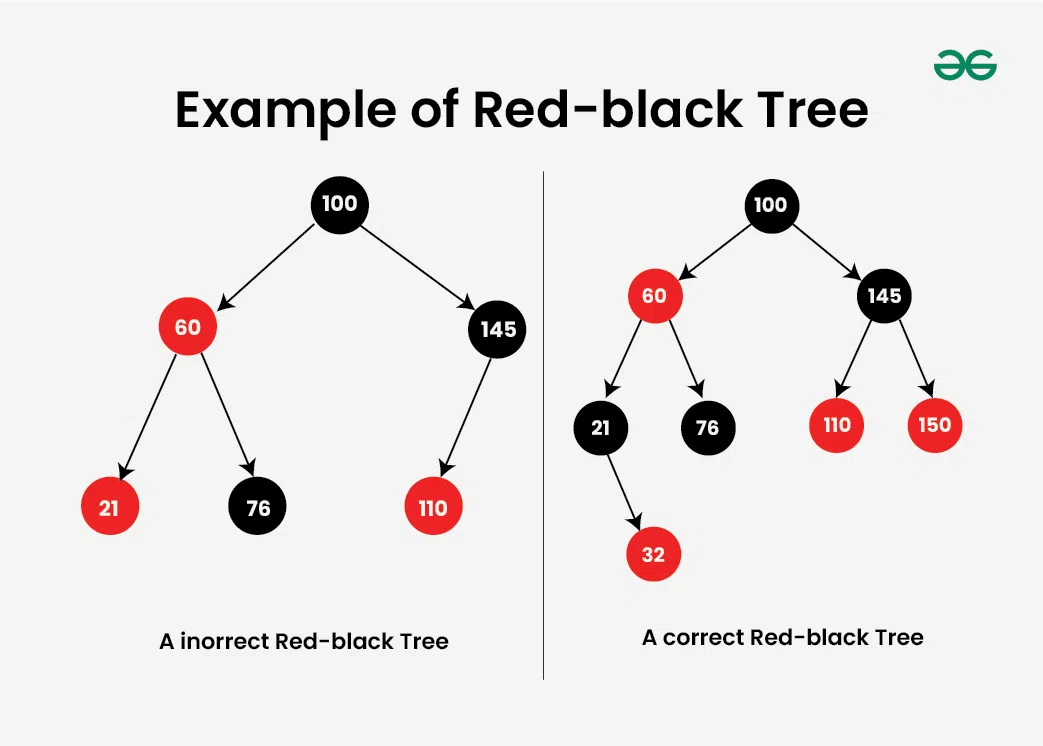

* Правильное красно-черное дерево на изображении выше гарантирует, что каждый путь от корня к листовому узлу будет иметь одинаковое количество черных узлов. В данном случае он есть (без учета корневого узла).

Неправильное красно-черное дерево не следует красно-черным свойствам, так как два красных узла примыкают друг к другу. Другая проблема заключается в том, что один из путей к листовому узлу не имеет черных узлов, в то время как два других содержат черный узел.

### Почему красно-черные деревья?
Большинство операций BST (Binary Search Tree) (например, search, max, min, insert, delete. и т. д.) занимают $O(h)$ времени, где $h$ — высота BST. Стоимость этих операций может стать $O(n)$ для асимметричного двоичного дерева. Если мы убедимся, что высота дерева остается $O(log n)$ после каждой вставки и удаления, то мы можем гарантировать верхнюю границу $O(log n)$ для всех этих операций. Высота красно-черного дерева всегда равна $O(log n)$, где $n$ — количество узлов в дереве.

Воспоминания про BST: https://www.geeksforgeeks.org/binary-search-tree-data-structure/

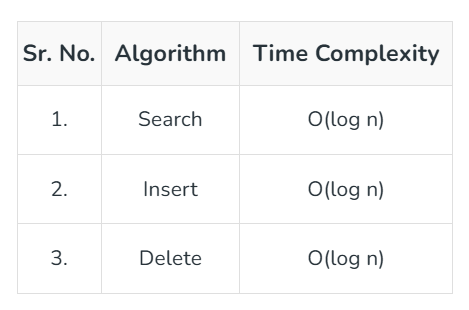

### Сравнение с AVL Tree:
Деревья AVL более сбалансированы по сравнению с красно-черными деревьями, но они могут вызывать большее количество вращений во время вставки и удаления. Поэтому, если ваше приложение включает в себя частые вставки и удаления, то следует отдать предпочтение красно-черным деревьям. А если вставки и удаления происходят реже, а поиск выполняется чаще, то AVL-дерево следует предпочесть красно-черному дереву.



### Как красно-черное дерево обеспечивает баланс?
Простой пример для понимания балансировки заключается в том, что цепочка из 3 узлов невозможна в красно-черном дереве. Мы можем попробовать любую комбинацию цветов и посмотреть, все ли они нарушают свойство дерева.

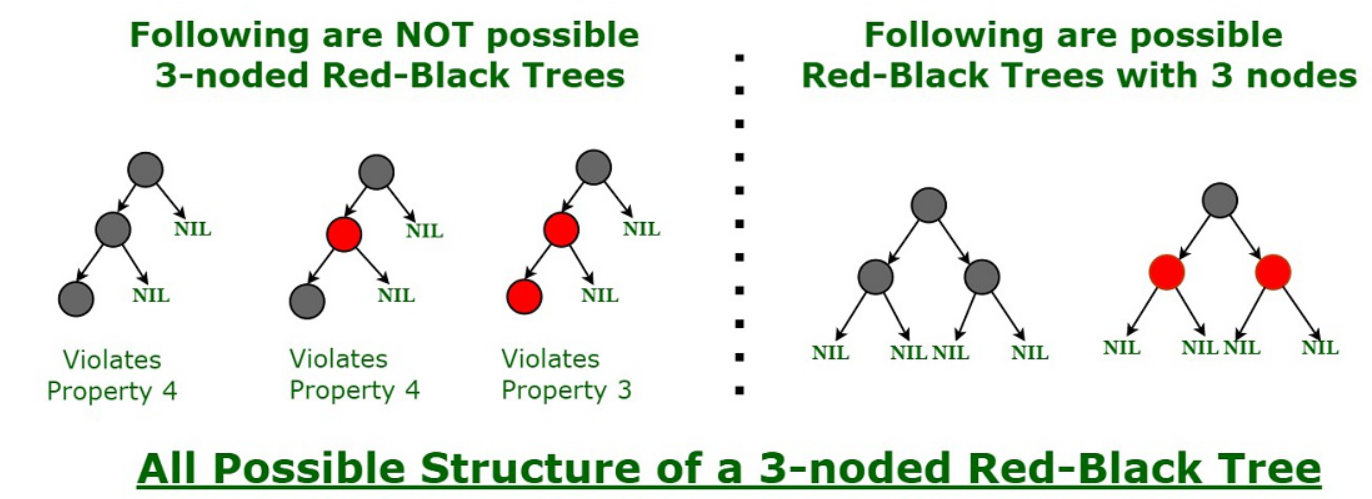

### Интересные моменты о Красно-Черном Дереве:
* Черная высота красно-черного дерева — это количество черных узлов на пути от корневого узла к листовому узлу. Листовые узлы также считаются черными. Так, красно-черное дерево высоты h имеет черную высоту >= h/2.

* Высота красно-черного дерева с n узлами h<= 2 log2(n + 1).

* Все листья (NIL) черные.

* Черная глубина узла определяется как количество черных узлов от корня до этого узла, т.е. количество черных предков.



### Реализация

In [1]:
class RBNode:
      # Constructor to initialize node of RB Tree
    def __init__(self, value, color='red'):
        self.value = value
        self.color = color
        self.left = None
        self.right = None
        self.parent = None

    # function to get the grandparent of node
    def grandparent(self):
        if self.parent is None:
            return None
        return self.parent.parent

    # function to get the sibling of node
    def sibling(self):
        if self.parent is None:
            return None
        if self == self.parent.left:
            return self.parent.right
        return self.parent.left

    # function to get the uncle of node
    def uncle(self):
        if self.parent is None:
            return None
        return self.parent.sibling()


Основные операции на красно-черном дереве:
Основные операции на красно-черном дереве включают в себя:

* Вставка
* Поиск
* Удаление
* Вращение

### 1. Вставка
Вставка нового узла в красно-черное дерево состоит из двух этапов: выполняется стандартная вставка двоичного дерева поиска (BST) с последующим исправлением любых нарушений свойств красно-черных.

**Этапы вставки**
* BST Insert: Вставьте новый узел, как в стандартном BST.
* Исправьте нарушения:
- - Если родитель нового узла черный, никакие свойства не нарушаются.
- - Если родительский элемент красный, дерево может нарушить свойство Red, что потребует исправления.

* Исправление нарушений во время вставки
После вставки нового узла в качестве красного узла мы можем столкнуться с несколькими случаями в зависимости от цветов родителя и uncle узла (брата и сестры родителя):

- - **Случай 1**: Дядя красный:   
Перекрасьте родителя и дядю в черный, а бабушку и дедушку в красный. Затем переместитесь вверх по дереву, чтобы проверить наличие дальнейших нарушений.
- - **Случай 2**: Дядя черный:  
**Подслучай 2.1* : Узел является правым потомком: Выполните поворот влево на родительском узле.
**Подслучай 2.2*: Узел является левым дочерним элементом: Выполните поворот вправо на прародителя и перекрасьте его соответствующим образом.


In [2]:
# Class to implement Red Black Tree
class RedBlackTree:
        # Constructor
    def __init__(self):
        self.root = None

    # Function to fix the Red Black Tree properties after insertion
    def insert_fix(self, new_node):
          # While there are two continuous red nodes, we need to fix the RB tree
        while new_node.parent and new_node.parent.color == 'red':
            # If the parent is left child of grandparent
            if new_node.parent == new_node.grandparent().left:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.right:
                        new_node = new_node.parent
                        self.rotate_left(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_right(new_node.grandparent())
            # If the parent is right child of grandparent
            else:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.left:
                        new_node = new_node.parent
                        self.rotate_right(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_left(new_node.grandparent())
        self.root.color = 'black'

    # function to insert a node similar to BST insertion
    def insert(self, value):
        # Regular BST insert
        new_node = RBNode(value)
        if self.root is None:
            self.root = new_node
        else:
            curr_node = self.root
            while True:
                  # If the node is in the left subtree
                if value < curr_node.value:
                    if curr_node.left is None:
                        curr_node.left = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.left
                # If the node is in the right subtree
                else:
                    if curr_node.right is None:
                        curr_node.right = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.right
        self.insert_fix(new_node)


### 2. Поиск
Поиск узла в красно-черном дереве аналогичен поиску в стандартном двоичном дереве поиска (BST). Операция поиска следует по прямому пути от корня к листу, сравнивая целевое значение со значением текущего узла и перемещаясь влево или вправо соответственно.

**Шаги поиска**  
* Начать с корня: Начните поиск с корневого узла.
Пройдите по дереву:
- - Если целевое значение равно значению текущего узла, то узел найден.
- - Если целевое значение меньше значения текущего узла, перейдите к левому дочернему узлу.
- - Если целевое значение больше значения текущего узла, перейдите к правому дочернему узлу.

* Повторить: Продолжайте этот процесс до тех пор, пока не будет найдено целевое значение или не будет достигнут узел NIL (указывающий на то, что значение отсутствует в дереве).



### 3. Удаление



Реализация удаления в красно-черном дереве также требует сохранения цветовых инвариантов после удаления узлов. Удаление в Red Black Tree происходит в две части:

1. **Стандартное удаление BST**: Сначала мы реализуем стандартный процесс удаления BST-узлов.

2. **Исправление красно-черного дерева после удаления**: Как и вставка, удаление может нарушить инварианты красно-черного дерева. Есть два основных случая:

Случай 1: Удаленный узел был черным.  
Случай 2: Удаленный узел был красным.
Ниже приведена реализация Удаления в Red Black Tree в Python:

In [3]:
def delete(self, value):
    node_to_remove = self.search(value)

    if node_to_remove is None:
        return

    if node_to_remove.left is None or node_to_remove.right is None:
        self._replace_node(
            node_to_remove, node_to_remove.left or node_to_remove.right)
    else:
        successor = self._find_min(node_to_remove.right)
        node_to_remove.value = successor.value
        self._replace_node(successor, successor.right)

    self.delete_fix(node_to_remove)

def delete_fix(self, x):
    while x != self.root and x.color == 'black':
        if x == x.parent.left:
            sibling = x.sibling()
            if sibling.color == 'red':
                sibling.color = 'black'
                x.parent.color = 'red'
                self.rotate_left(x.parent)
                sibling = x.sibling()
            if (sibling.left is None or sibling.left.color == 'black') and (sibling.right is None or sibling.right.color == 'black'):
                sibling.color = 'red'
                x = x.parent
            else:
                if sibling.right is None or sibling.right.color == 'black':
                    sibling.left.color = 'black'
                    sibling.color = 'red'
                    self.rotate_right(sibling)
                    sibling = x.sibling()
                sibling.color = x.parent.color
                x.parent.color = 'black'
                if sibling.right:
                    sibling.right.color = 'black'
                self.rotate_left(x.parent)
                x = self.root
        else:
            sibling = x.sibling()
            if sibling.color == 'red':
                sibling.color = 'black'
                x.parent.color = 'red'
                self.rotate_right(x.parent)
                sibling = x.sibling()
            if (sibling.left is None or sibling.left.color == 'black') and (sibling.right is None or sibling.right.color == 'black'):
                sibling.color = 'red'
                x = x.parent
            else:
                if sibling.left is None or sibling.left.color == 'black':
                    sibling.right.color = 'black'
                    sibling.color = 'red'
                    self.rotate_left(sibling)
                    sibling = x.sibling()
                sibling.color = x.parent.color
                x.parent.color = 'black'
                if sibling.left:
                    sibling.left.color = 'black'
                self.rotate_right(x.parent)
                x = self.root
    x.color = 'black'


### Вращение


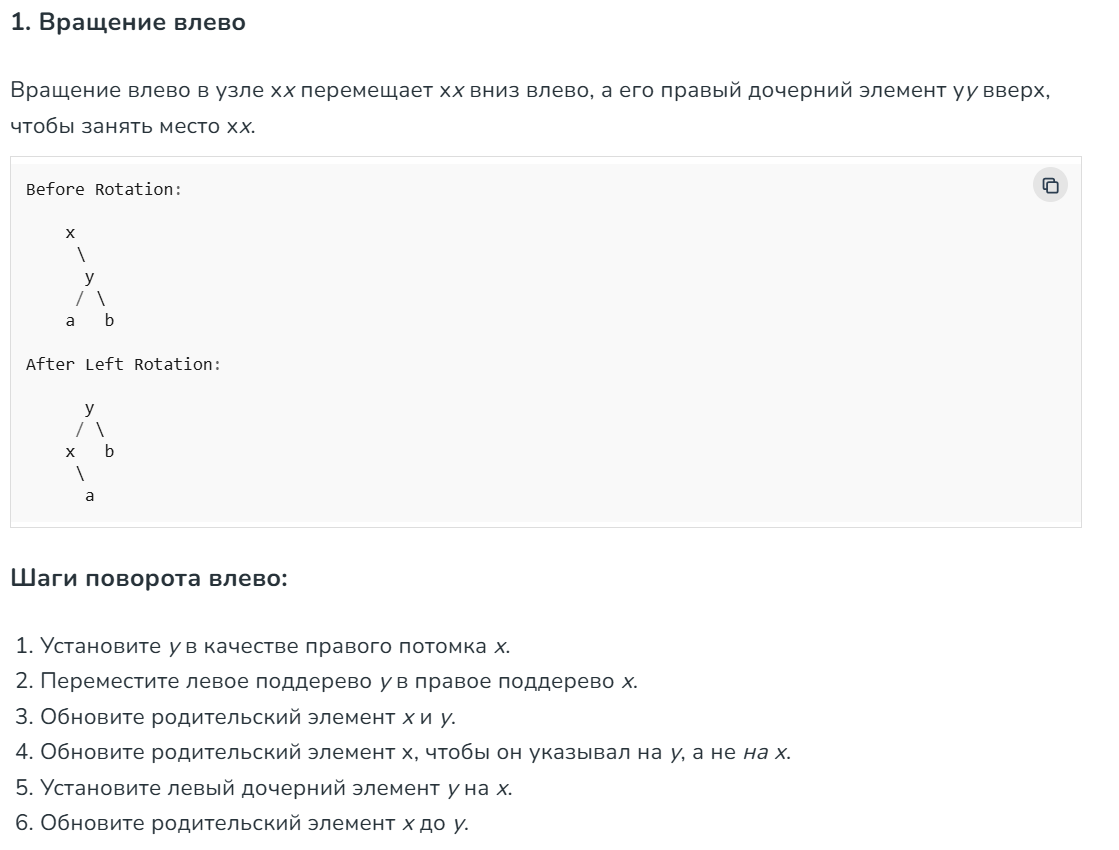

In [4]:
# function for left rotation of RB Tree
def rotate_left(self, node):
    right_child = node.right
    node.right = right_child.left

    if right_child.left is not None:
        right_child.left.parent = node

    right_child.parent = node.parent

    if node.parent is None:
        self.root = right_child
    elif node == node.parent.left:
        node.parent.left = right_child
    else:
        node.parent.right = right_child

    right_child.left = node
    node.parent = right_child


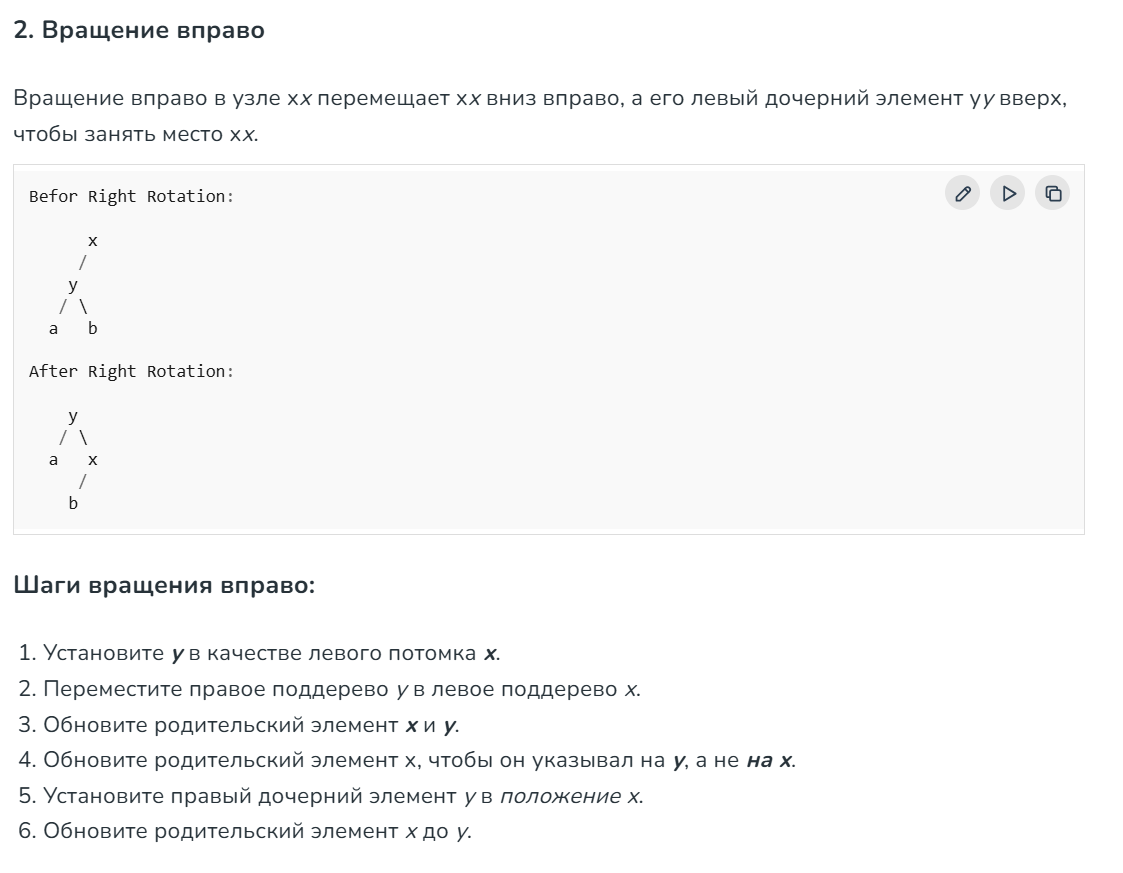

In [5]:
# function for right rotation of RB Tree
def rotate_right(self, node):
    left_child = node.left
    node.left = left_child.right

    if left_child.right is not None:
        left_child.right.parent = node

    left_child.parent = node.parent

    if node.parent is None:
        self.root = left_child
    elif node == node.parent.right:
        node.parent.right = left_child
    else:
        node.parent.left = left_child

    left_child.right = node
    node.parent = left_child


### Полная версия

In [ ]:
# class to implement node of RB Tree
class RBNode:
        # cnostructor
    def __init__(self, value, color='red'):
        self.value = value
        self.color = color
        self.left = None
        self.right = None
        self.parent = None

    # function to get the grandparent of node
    def grandparent(self):
        if self.parent is None:
            return None
        return self.parent.parent

    # function to get the sibling of node
    def sibling(self):
        if self.parent is None:
            return None
        if self == self.parent.left:
            return self.parent.right
        return self.parent.left

    # function to get the uncle of node
    def uncle(self):
        if self.parent is None:
            return None
        return self.parent.sibling()

# function to implement Red Black Tree


class RedBlackTree:
        # constructor to initialize the RB tree
    def __init__(self):
        self.root = None

    # function to search a value in RB Tree
    def search(self, value):
        curr_node = self.root
        while curr_node is not None:
            if value == curr_node.value:
                return curr_node
            elif value < curr_node.value:
                curr_node = curr_node.left
            else:
                curr_node = curr_node.right
        return None

    # function to insert a node in RB Tree, similar to BST insertion
    def insert(self, value):
        # Regular insertion
        new_node = RBNode(value)
        if self.root is None:
            self.root = new_node
        else:
            curr_node = self.root
            while True:
                if value < curr_node.value:
                    if curr_node.left is None:
                        curr_node.left = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.left
                else:
                    if curr_node.right is None:
                        curr_node.right = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.right
        self.insert_fix(new_node)

    # Function to fix RB tree properties after insertion
    def insert_fix(self, new_node):
        while new_node.parent and new_node.parent.color == 'red':
            if new_node.parent == new_node.grandparent().left:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.right:
                        new_node = new_node.parent
                        self.rotate_left(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_right(new_node.grandparent())
            else:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.left:
                        new_node = new_node.parent
                        self.rotate_right(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_left(new_node.grandparent())
        self.root.color = 'black'

    # function to delete a value from RB Tree
    def delete(self, value):
        node_to_remove = self.search(value)

        if node_to_remove is None:
            return

        if node_to_remove.left is None or node_to_remove.right is None:
            self._replace_node(
                node_to_remove, node_to_remove.left or node_to_remove.right)
        else:
            successor = self._find_min(node_to_remove.right)
            node_to_remove.value = successor.value
            self._replace_node(successor, successor.right)

        self.delete_fix(node_to_remove)

    # function to fix RB Tree properties after deletion
    def delete_fix(self, x):
        while x != self.root and x.color == 'black':
            if x == x.parent.left:
                sibling = x.sibling()
                if sibling.color == 'red':
                    sibling.color = 'black'
                    x.parent.color = 'red'
                    self.rotate_left(x.parent)
                    sibling = x.sibling()
                if (sibling.left is None or sibling.left.color == 'black') and (sibling.right is None or sibling.right.color == 'black'):
                    sibling.color = 'red'
                    x = x.parent
                else:
                    if sibling.right is None or sibling.right.color == 'black':
                        sibling.left.color = 'black'
                        sibling.color = 'red'
                        self.rotate_right(sibling)
                        sibling = x.sibling()
                    sibling.color = x.parent.color
                    x.parent.color = 'black'
                    if sibling.right:
                        sibling.right.color = 'black'
                    self.rotate_left(x.parent)
                    x = self.root
            else:
                sibling = x.sibling()
                if sibling.color == 'red':
                    sibling.color = 'black'
                    x.parent.color = 'red'
                    self.rotate_right(x.parent)
                    sibling = x.sibling()
                if (sibling.left is None or sibling.left.color == 'black') and (sibling.right is None or sibling.right.color == 'black'):
                    sibling.color = 'red'
                    x = x.parent
                else:
                    if sibling.left is None or sibling.left.color == 'black':
                        sibling.right.color = 'black'
                        sibling.color = 'red'
                        self.rotate_left(sibling)
                        sibling = x.sibling()
                    sibling.color = x.parent.color
                    x.parent.color = 'black'
                    if sibling.left:
                        sibling.left.color = 'black'
                    self.rotate_right(x.parent)
                    x = self.root
        x.color = 'black'

    # Function for left rotation of RB Tree
    def rotate_left(self, node):
        right_child = node.right
        node.right = right_child.left

        if right_child.left is not None:
            right_child.left.parent = node

        right_child.parent = node.parent

        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child

        right_child.left = node
        node.parent = right_child

    # function for right rotation of RB Tree
    def rotate_right(self, node):
        left_child = node.left
        node.left = left_child.right

        if left_child.right is not None:
            left_child.right.parent = node

        left_child.parent = node.parent

        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child

        left_child.right = node
        node.parent = left_child

    # function to replace an old node with a new node
    def _replace_node(self, old_node, new_node):
        if old_node.parent is None:
            self.root = new_node
        else:
            if old_node == old_node.parent.left:
                old_node.parent.left = new_node
            else:
                old_node.parent.right = new_node
        if new_node is not None:
            new_node.parent = old_node.parent

    # function to find node with minimum value in a subtree
    def _find_min(self, node):
        while node.left is not None:
            node = node.left
        return node

    # function to perform inorder traversal
    def _inorder_traversal(self, node):
        if node is not None:
            self._inorder_traversal(node.left)
            print(node.value, end=" ")
            self._inorder_traversal(node.right)


# Example driver code
if __name__ == "__main__":
    tree = RedBlackTree()
    tree.insert(10)
    tree.insert(20)
    tree.insert(30)
    tree.insert(40)
    tree.insert(50)
    tree.insert(25)

    print("Inorder traversal of the Red-Black Tree:")
    tree._inorder_traversal(tree.root)
    print()

    tree.delete(20)

    print("Inorder traversal of the Red-Black Tree after deleting 20")
    tree._inorder_traversal(tree.root)
    print()


**Преимущества красно-черных деревьев:**
* Сбалансированные: Красно-черные деревья являются самобалансирующимися, то есть они автоматически поддерживают баланс между высотой левого и правого поддеревьев. Это гарантирует, что операции поиска, вставки и удаления в худшем случае займут O(log n) времени.

* Эффективный поиск, вставка и удаление: Благодаря своей сбалансированной структуре, красно-черные деревья обеспечивают эффективную работу. Поиск, вставка и удаление в худшем случае занимают O(log n) времени.

* Простота реализации: Правила обслуживания свойств «Красно-черное дерево» относительно просты и понятны в реализации.

* Широко используется: Красно-черные деревья являются популярным выбором для реализации различных структур данных, таких как карты, наборы и очереди приоритетов.

**Недостатки красно-черных деревьев:**
* Более сложные, чем другие сбалансированные деревья: По сравнению с более простыми сбалансированными деревьями, такими как AVL-деревья, красно-черные деревья имеют более сложные правила вставки и удаления.

* Постоянные накладные расходы: Обслуживание свойств «Красно-черное дерево» добавляет небольшие накладные расходы при каждой операции вставки и удаления.

* Не оптимален для всех сценариев использования: Несмотря на эффективность для большинства операций, Red-Black Trees может быть не лучшим выбором для приложений, где требуется частое вставка и удаление, поскольку постоянные накладные расходы могут стать значительными.
